In [1]:
%matplotlib inline

from HeaderP import *
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
plt.rcParams.keys()
plt.rc('font', family='serif')
params = {
   'axes.labelsize': 30,
   'axes.linewidth': 1.5,
   'legend.fontsize': 25,
   'legend.frameon': False,
   'lines.linewidth': 2,
   'xtick.direction': 'in',
   'xtick.labelsize': 25,
   'xtick.major.bottom': True,
   'xtick.major.pad': 10,
   'xtick.major.size': 10,
   'xtick.major.width': 1,
   'xtick.minor.bottom': True,
   'xtick.minor.pad': 3.5,
   'xtick.minor.size': 5,
   'xtick.minor.top': True,
   'xtick.minor.visible': True,
   'xtick.minor.width': 1,
   'xtick.top': True,
   'ytick.direction': 'in',
   'ytick.labelsize': 25,
   'ytick.major.pad': 10,
   'ytick.major.size': 10,
   'ytick.major.width': 1,
   'ytick.minor.pad': 3.5,
   'ytick.minor.size': 5,
   'ytick.minor.visible': True,
   'ytick.minor.width': 1,
   'ytick.right': True,
   'figure.figsize': [10,10], # instead of 4.5, 4.5
   'savefig.format': 'eps',
   }
plt.rcParams.update(params)


    

/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:16: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, namedtuple, defaultdict, Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module 

# Training set

In [2]:
df_age=pd.read_pickle('training.pkl')

In [3]:
len(df_age)

2616

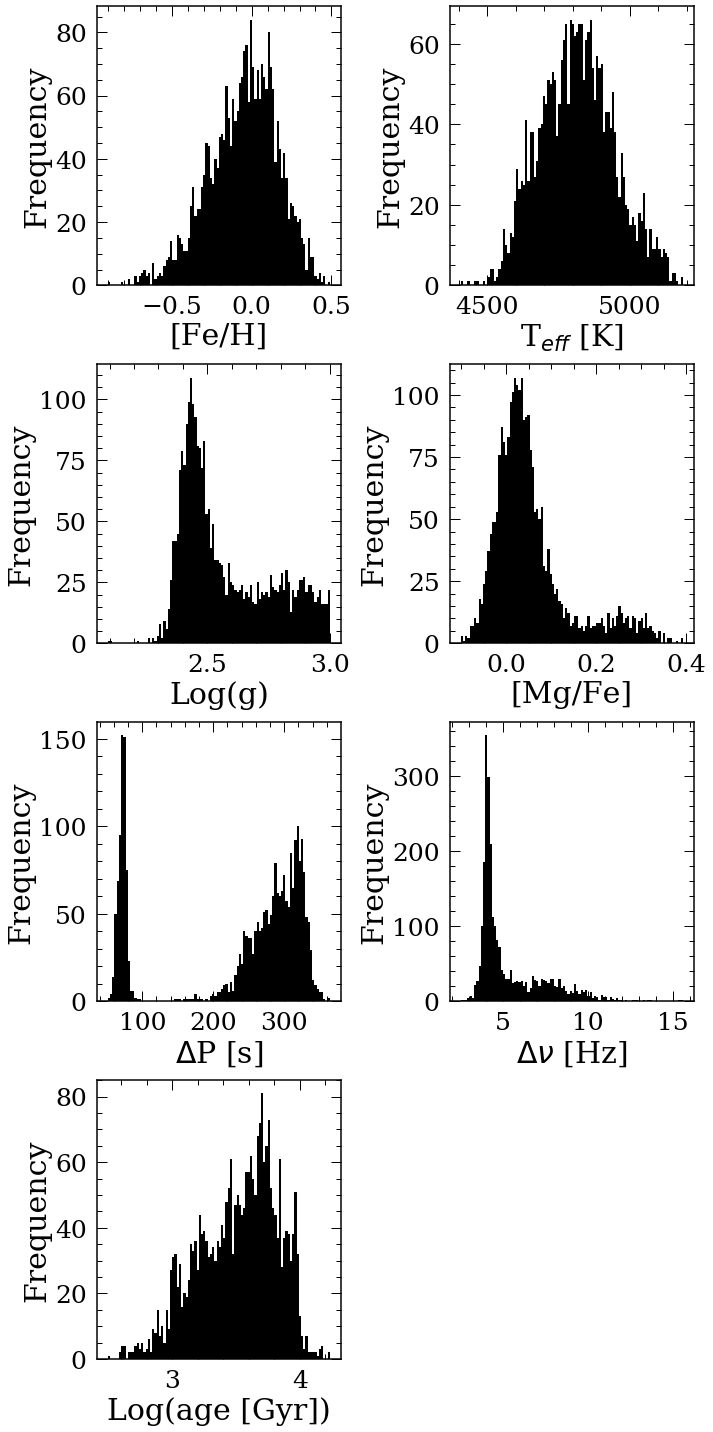

In [4]:
TF=['M_H','TEFF','LOGG','MG_FE','DPi1','Dnu','LogAge']
titles=['[Fe/H]','T$_{eff}$ [K]','Log(g)','[Mg/Fe]','$\Delta$P [s]','$\Delta$$\\nu$ [Hz]','Log(age [Gyr])']
plt.figure(figsize=(10,20))
for i in range(1,8):
    plt.subplot(4,2,i)
    plt.hist(df_age[TF[i-1]],color='k',bins=100)
    plt.xlabel(titles[i-1])
    plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('TraningHist.png')

Ages from https://ui.adsabs.harvard.edu/abs/2019yCat..22390032P/abstract

# For AS stars

In [2]:
df=pd.read_pickle('../ASstars.pkl')
print(len(df))
print(np.median(df['Age_err'].dropna()))

6727
0.8777411473258232


1601 5109


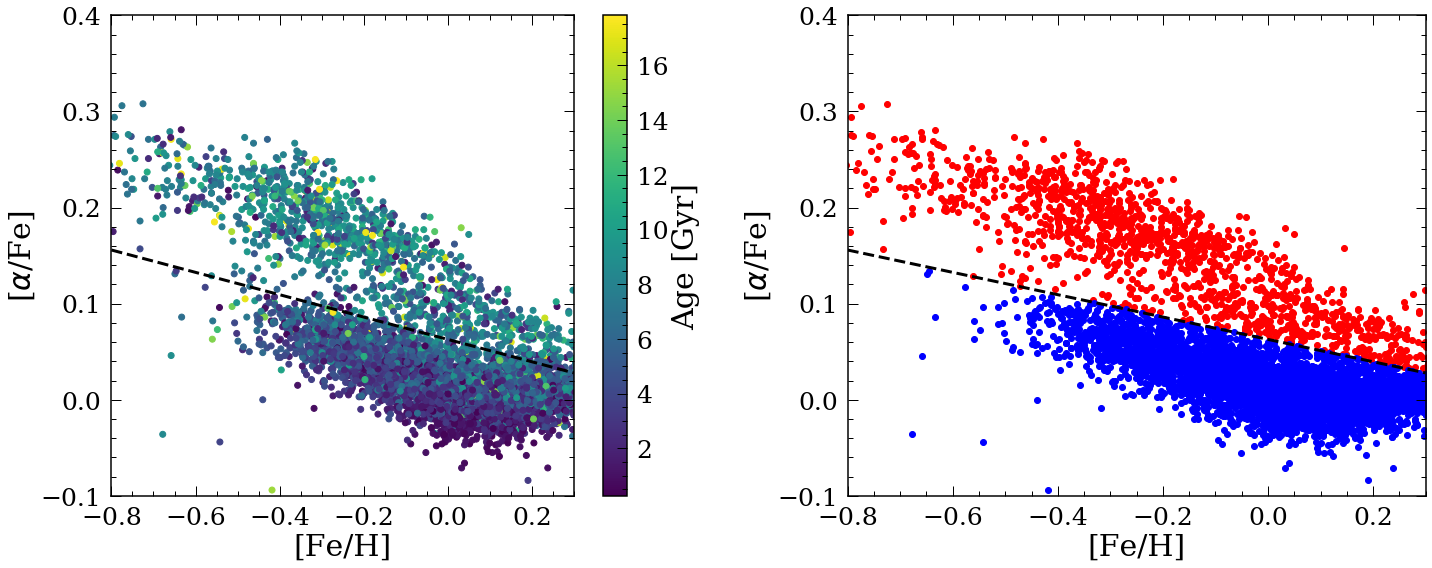

In [3]:
p=fitpoints([-0.75,0.11],[0.15,0.05])

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
cm = plt.cm.get_cmap('viridis',5)
plt.scatter(df['FeH'],df['AFe'],c=df['Age'])
plt.plot([-0.8,0.3],p([-0.8,0.3]),'k--',linewidth=3)
plt.xlim([-0.8,0.3])
plt.ylim([-0.1,0.4])
plt.xlabel('[Fe/H]')
plt.ylabel('[$\\alpha$/Fe]')
cb=plt.colorbar()
cb.set_label('Age [Gyr]')


high_alpha=df[df['AFe']-p(df['FeH'])>=0]
low_alpha=df[df['AFe']-p(df['FeH'])<0]

print(len(high_alpha),len(low_alpha))

p=fitpoints([-0.75,0.11],[0.15,0.05])

plt.subplot(1,2,2)
plt.scatter(high_alpha['FeH'],high_alpha['AFe'],c='r')
plt.scatter(low_alpha['FeH'],low_alpha['AFe'],c='b')
plt.plot([-0.8,0.3],p([-0.8,0.3]),'k--',linewidth=3)
plt.xlim([-0.8,0.3])
plt.ylim([-0.1,0.4])
plt.xlabel('[Fe/H]')
plt.ylabel('[$\\alpha$/Fe]')

plt.tight_layout()

In [18]:
df_abun_st_ha=high_alpha.loc[abs(high_alpha['M_H'])<0.05]
df_abun_st_la=low_alpha.loc[abs(low_alpha['M_H'])<0.05]

# For rc stars

In [5]:
abun_apog=['M_H','C_FE','N_FE','O_FE','NA_FE','MG_FE','AL_FE','SI_FE','S_FE','K_FE','CA_FE','TI_FE',
           'V_FE','MN_FE','NI_FE','P_FE','CR_FE','CO_FE','ALPHA_M']
print(len(abun_apog))

19


In [6]:
df_CM=pd.read_pickle('../CannonDR16_cut.pkl')
for i in abun_apog:
    df_CM=df_CM.loc[abs(df_CM[i])<5]
df_CM=df_CM.reset_index(drop=True)

print('All stars:',len(df_CM))

# get red clump stars
df_rc=df_CM.loc[df_CM['DP']>230]


print('rc stars',len(df_rc))

All stars: 64399
rc stars 22074


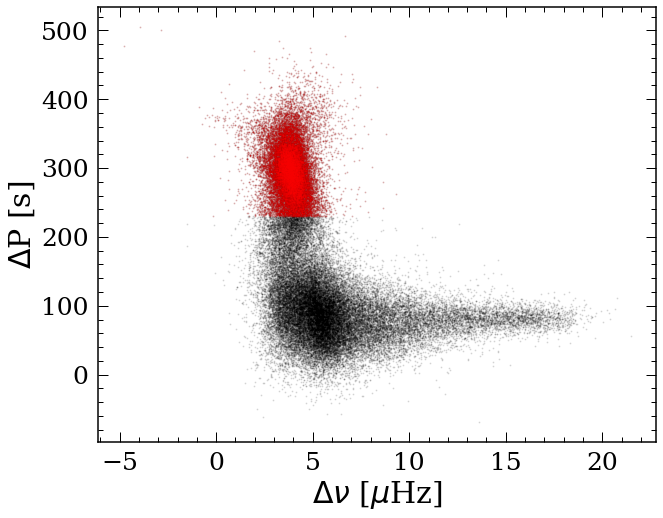

In [7]:
plt.figure(figsize=(10,8))
plt.scatter(df_CM['Dnu'],df_CM['DP'],c='k',s=1,alpha=0.1,label='all stars')
plt.scatter(df_rc['Dnu'],df_rc['DP'],c='r',s=1,alpha=0.1,label='Red Clump stars')
plt.xlabel('$\Delta$$\\nu$ [$\mu$Hz]')
plt.ylabel('$\Delta$P [s]')
plt.savefig('RCdet.png')

In [8]:
np.mean(df_CM['LogAge_err']+0.17)

0.24654513516173335

In [9]:
df_CM['Age_err']=(np.power(10,df_CM['LogAge']+df_CM['LogAge_err']+0.17)-
                  np.power(10,df_CM['LogAge']-df_CM['LogAge_err']-0.17))/2/1000


In [10]:
la=df_CM[df_CM['hi_low_line']==0]
ha=df_CM[df_CM['hi_low_line']==1]

In [11]:
np.mean(df_CM['Age']),np.std(df_CM['Age'])

(6.260836220042801, 3.2945605893413528)

In [12]:
print(np.median(df_CM['Age_err']))

3.427440499492036


In [13]:
print(np.mean(la['Age']),np.std(la['Age']))
print(np.mean(ha['Age']),np.std(ha['Age']))

5.393412914730132 2.8887034432548537
8.796263392241995 3.0921892616854616


In [14]:
(sum(la['Age']>8))/len(la)


0.15167871954650605

In [15]:
(sum(ha['Age']<5))/len(ha)

0.06755604288499026

In [16]:
sum(df_CM['R']>17)

138

Plot age image

/Users/lucy/Desktop/SecondYear/Figures/HeaderP.py:1172: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm


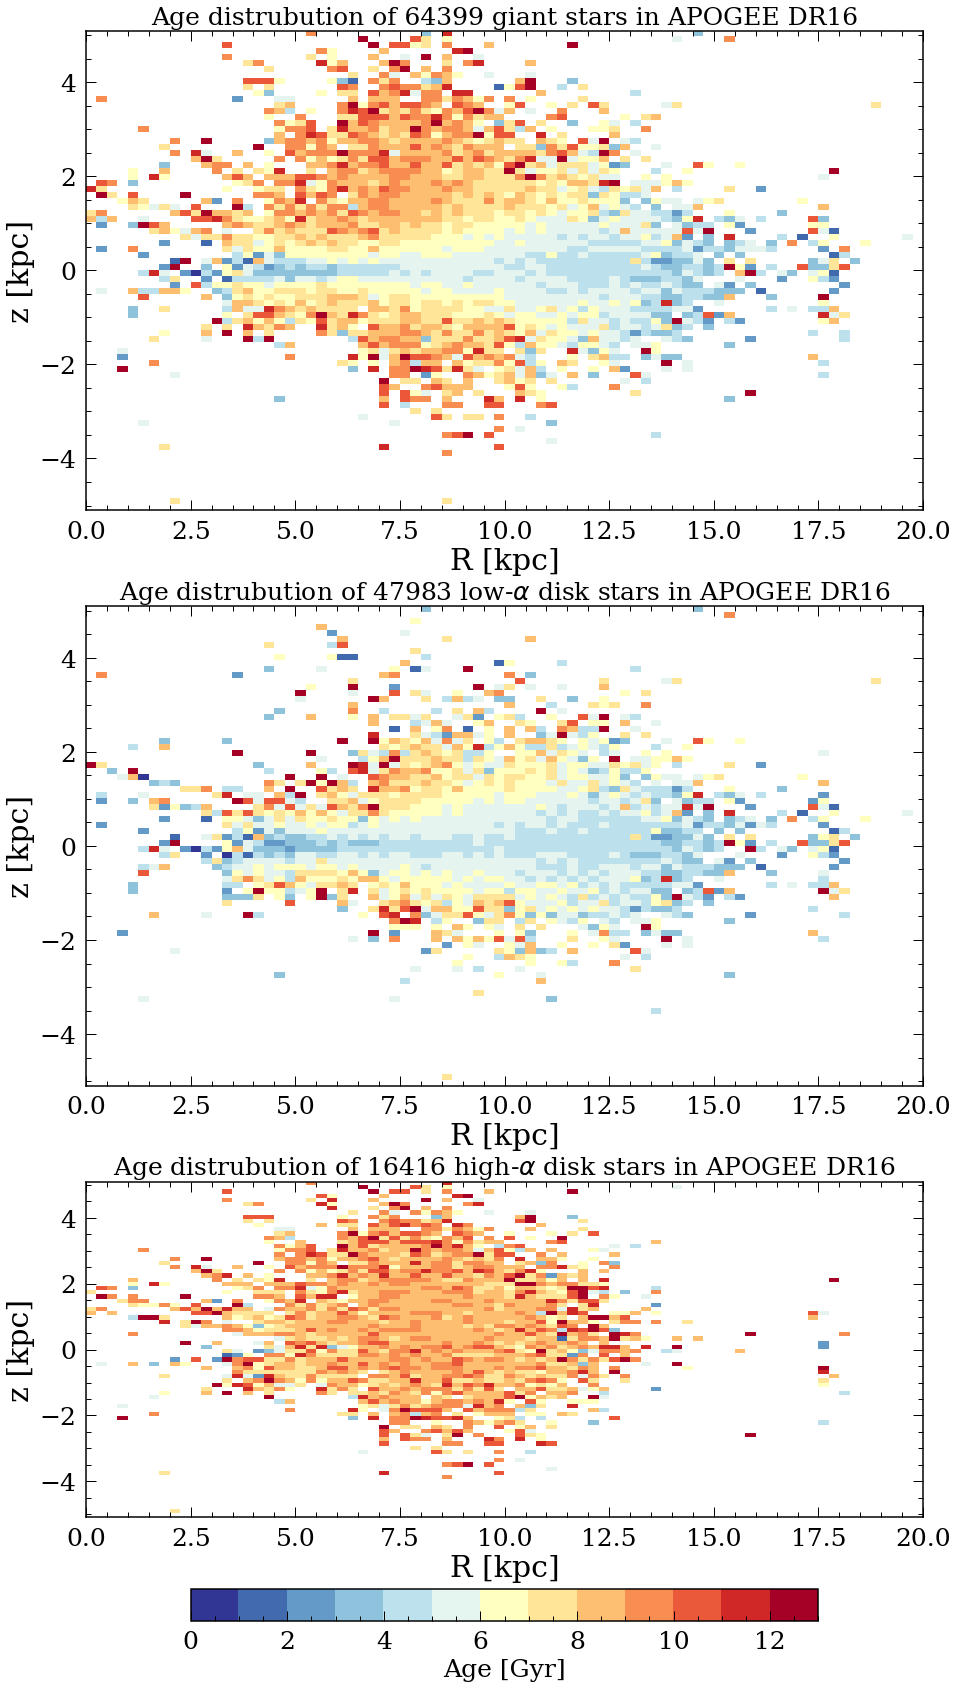

In [17]:

x1,x2,y1,y2 = 0,20,-5.1,5.1
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 80

cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
cmap1.set_bad('white',1.)


plt.figure(figsize=(15,30))

plt.subplot(3,1,1)

image=makeagemap_each(df_CM['R'].values,df_CM['z'].values,
                df_CM['Age'].values,lims, binnum)
plt.imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
           extent = (x1,x2, y1,y2),cmap=cmap1, vmin=0,vmax=13)

plt.xlabel('R [kpc]')
plt.ylabel('z [kpc]')
plt.title('Age distrubution of %d giant stars in APOGEE DR16'%len(df_CM),fontsize=25)

plt.subplot(3,1,2)

image=makeagemap_each(df_CM.loc[df_CM['hi_low_line']==0]['R'].values,df_CM.loc[df_CM['hi_low_line']==0]['z'].values,
                df_CM['Age'].loc[df_CM['hi_low_line']==0].values,lims, binnum)
plt.imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
           extent = (x1,x2, y1,y2),cmap=cmap1, vmin=0,vmax=13)
plt.xlabel('R [kpc]')
plt.ylabel('z [kpc]')
plt.title('Age distrubution of %d low-$\\alpha$ disk stars in APOGEE DR16'%len(df_CM.loc[df_CM['hi_low_line']==0]),fontsize=25)


plt.subplot(3,1,3)

image=makeagemap_each(df_CM.loc[df_CM['hi_low_line']==1]['R'].values,df_CM.loc[df_CM['hi_low_line']==1]['z'].values,
                df_CM['Age'].loc[df_CM['hi_low_line']==1].values,lims, binnum)
plt.imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
           extent = (x1,x2, y1,y2),cmap=cmap1, vmin=0,vmax=13)

cb=plt.colorbar(orientation = 'horizontal', shrink=.75)
cb.set_label('Age [Gyr]',fontsize = 25,labelpad = 5)
plt.xlabel('R [kpc]')
plt.ylabel('z [kpc]')
plt.title('Age distrubution of %d high-$\\alpha$ disk stars in APOGEE DR16'%len(df_CM.loc[df_CM['hi_low_line']==1]),fontsize=25)





plt.savefig('ageAll.png')

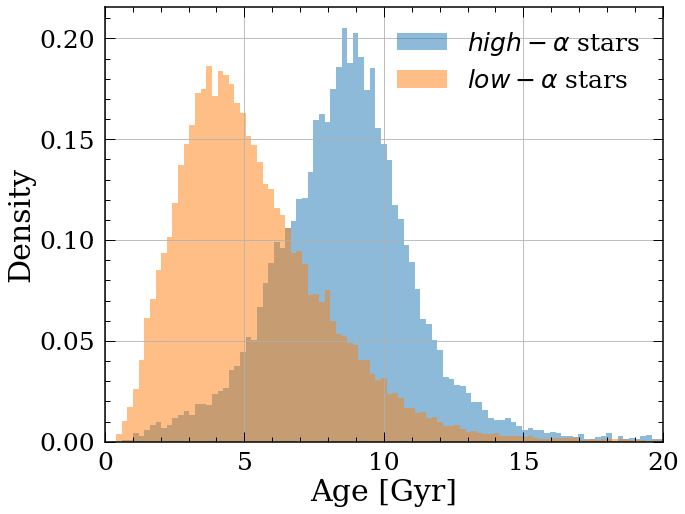

In [18]:
plt.figure(figsize=(10,8))
#df_CM=df_CM.loc[(df_CM['M_H'])<0.5]
df_CM.loc[df_CM['hi_low_line']==1]['Age'].hist(bins=np.linspace(0,20,100),alpha=0.5,density=True,
                                               label='$high-\\alpha$ stars')
df_CM.loc[df_CM['hi_low_line']==0]['Age'].hist(bins=np.linspace(0,20,100),alpha=0.5,density=True,
                                               label='$low-\\alpha$ stars')
plt.xlim([0,30])
plt.xlabel('Age [Gyr]')
plt.ylabel('Density')
#plt.title('Age distribution of high-$\\alpha$ stars',fontsize=25)
plt.savefig('AgeHist_ha.png')
plt.xlim([0,20])
plt.legend()
#plt.yscale('log')

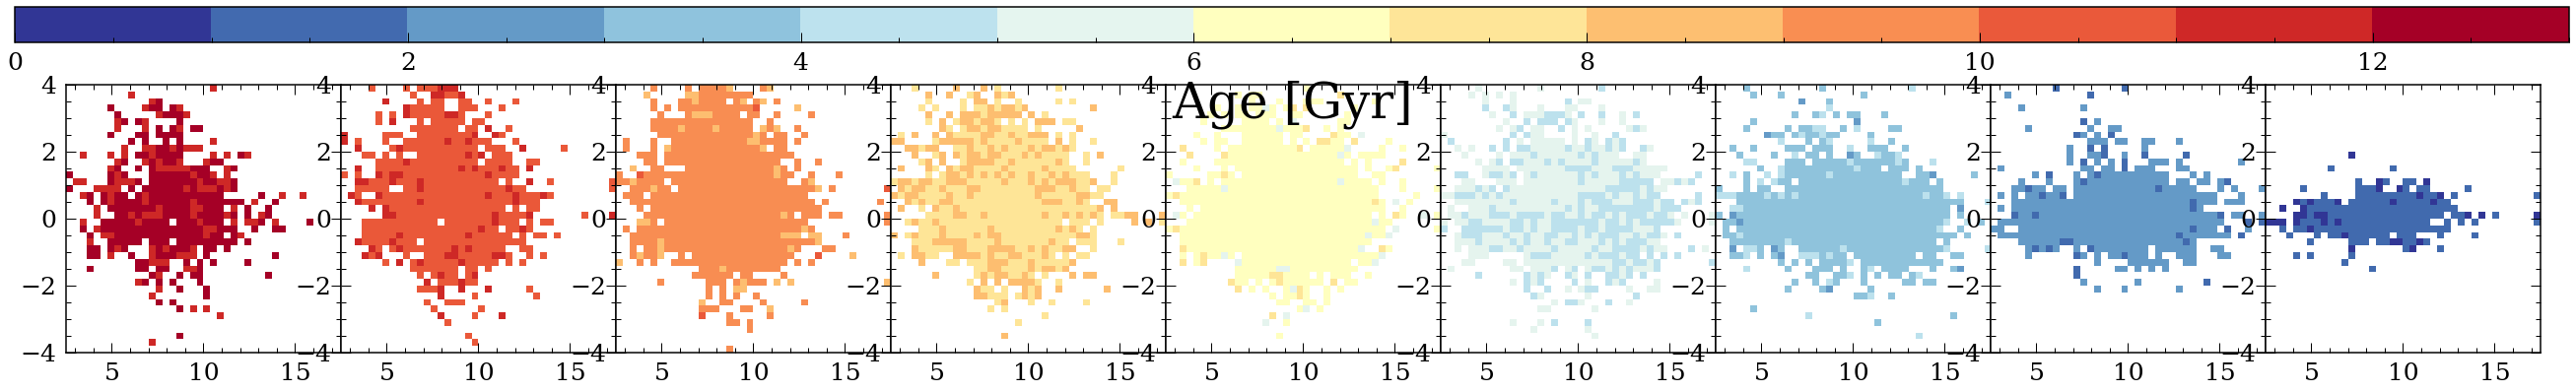

In [19]:
from scipy.ndimage import gaussian_filter

#Febin=np.linspace(-0.8,0.5,10)
#alpha=np.linspace(0.3,-0.05,10)
alpha=np.linspace(0,13,10)

#plt.figure(figsize=(len(Febin)*10-10,len(alpha)*10-10))

x1,x2,y1,y2 = 2.5,17.5,-4,4
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 40

#df_CM=df_CM.loc[df_CM['Age_err']<5]
print(len(df_CM))

fig, axarr = plt.subplots(1,len(alpha)-1,gridspec_kw={'hspace': 0, 'wspace': 0},
                          figsize=(len(alpha)*5-5,5))
count=0

for i in range(len(alpha)-1):
    print(i/(len(alpha)-1))
    clear_output(wait = True)
    
    df_all=df_CM.loc[df_CM['Age']>alpha[i]]
    df_all=df_all.loc[df_all['Age']<alpha[i+1]]
    
    image=makeagemap_each(df_all['R'].values,df_all['z'].values,
                df_all['Age'].values,lims, binnum)
        
        
    cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
    cmap1.set_bad('white',1.)
    
    x1m,x2m,y1m,y2m = lims[0], lims[1], lims[2], lims[3]
        
    im=axarr[8-i].imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
                   extent = (x1m,x2m, y1m,y2m),cmap=cmap1, vmin=0,vmax=13)
 
    
        
    plt.xlim(x1m,x2m)
    plt.ylim(y1m,y2m)

cb_ax = fig.add_axes([0.109, 1, 0.8, 0.1])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
car = cbar.set_label('Age [Gyr]',fontsize = 50,labelpad = 5)



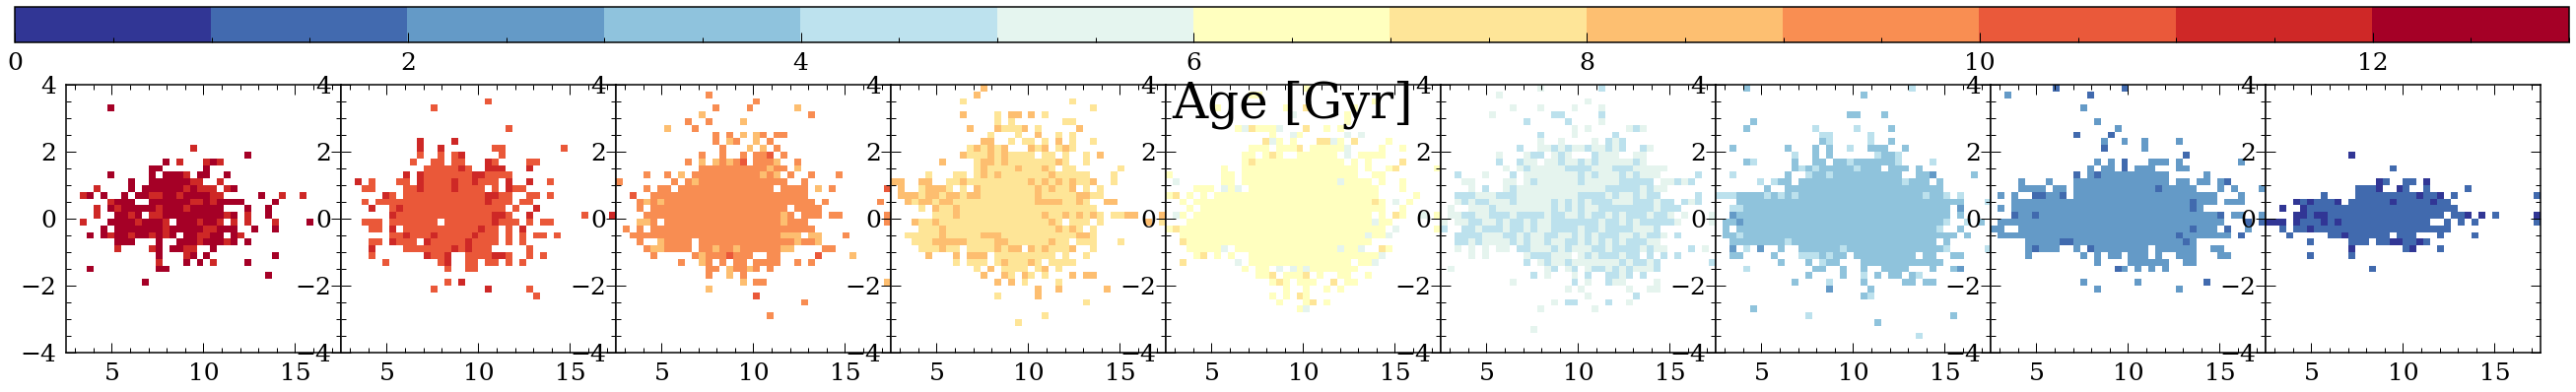

In [68]:
from scipy.ndimage import gaussian_filter
df_CM=df_CM.loc[df_CM['hi_low_line']==0].reset_index()
#Febin=np.linspace(-0.8,0.5,10)
#alpha=np.linspace(0.3,-0.05,10)
alpha=np.linspace(0,13,10)

#plt.figure(figsize=(len(Febin)*10-10,len(alpha)*10-10))

x1,x2,y1,y2 = 2.5,17.5,-4,4
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 40

#df_CM=df_CM.loc[df_CM['Age_err']<5]
print(len(df_CM))

fig, axarr = plt.subplots(1,len(alpha)-1,gridspec_kw={'hspace': 0, 'wspace': 0},
                          figsize=(len(alpha)*5-5,5))
count=0

for i in range(len(alpha)-1):
    print(i/(len(alpha)-1))
    clear_output(wait = True)
    
    df_all=df_CM.loc[df_CM['Age']>alpha[i]]
    df_all=df_all.loc[df_all['Age']<alpha[i+1]]
    
    image=makeagemap_each(df_all['R'].values,df_all['z'].values,
                df_all['Age'].values,lims, binnum)
        
        
    cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
    cmap1.set_bad('white',1.)
    
    x1m,x2m,y1m,y2m = lims[0], lims[1], lims[2], lims[3]
        
    im=axarr[8-i].imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
                   extent = (x1m,x2m, y1m,y2m),cmap=cmap1, vmin=0,vmax=13)
 
    
        
    plt.xlim(x1m,x2m)
    plt.ylim(y1m,y2m)

cb_ax = fig.add_axes([0.109, 1, 0.8, 0.1])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
car = cbar.set_label('Age [Gyr]',fontsize = 50,labelpad = 5)




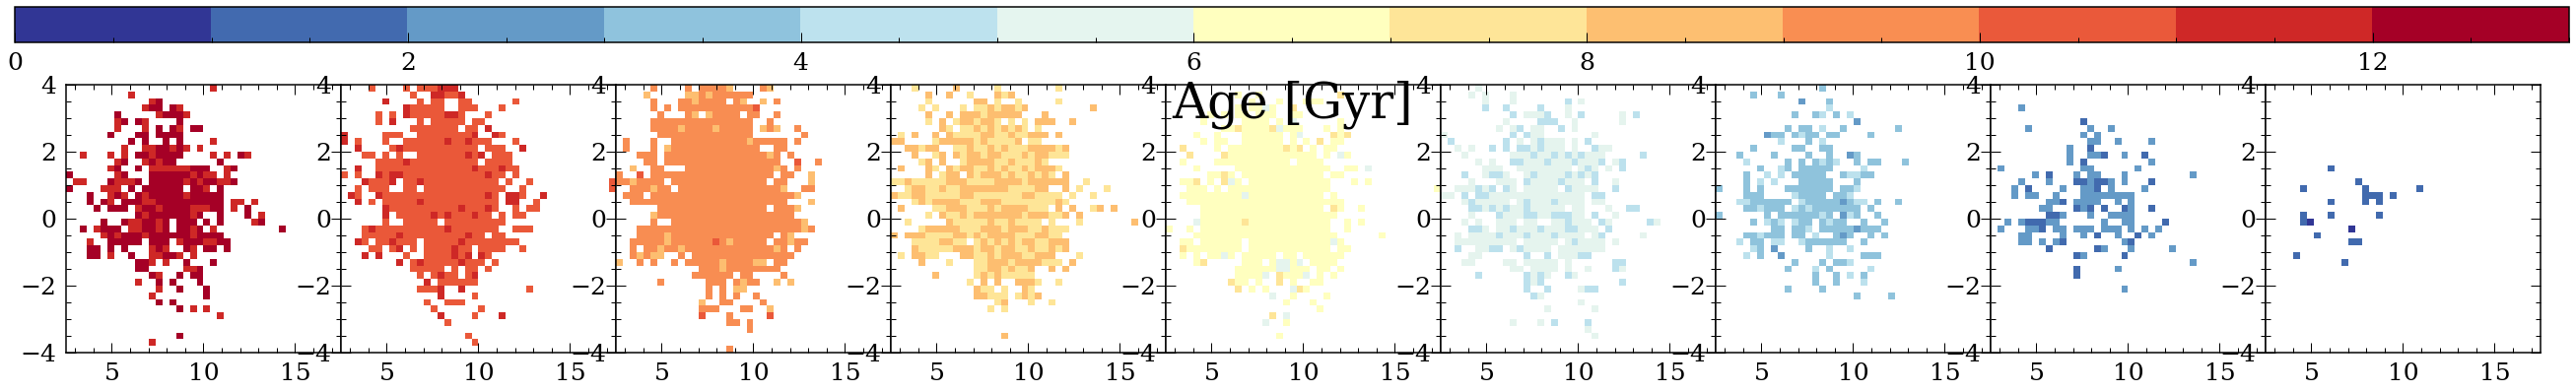

In [70]:
from scipy.ndimage import gaussian_filter
df_CM=df_CM.loc[df_CM['hi_low_line']==1].reset_index()
#Febin=np.linspace(-0.8,0.5,10)
#alpha=np.linspace(0.3,-0.05,10)
alpha=np.linspace(0,13,10)

#plt.figure(figsize=(len(Febin)*10-10,len(alpha)*10-10))

x1,x2,y1,y2 = 2.5,17.5,-4,4
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 40

#df_CM=df_CM.loc[df_CM['Age_err']<5]
print(len(df_CM))

fig, axarr = plt.subplots(1,len(alpha)-1,gridspec_kw={'hspace': 0, 'wspace': 0},
                          figsize=(len(alpha)*5-5,5))
count=0

for i in range(len(alpha)-1):
    print(i/(len(alpha)-1))
    clear_output(wait = True)
    
    df_all=df_CM.loc[df_CM['Age']>alpha[i]]
    df_all=df_all.loc[df_all['Age']<alpha[i+1]]
    
    image=makeagemap_each(df_all['R'].values,df_all['z'].values,
                df_all['Age'].values,lims, binnum)
        
        
    cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
    cmap1.set_bad('white',1.)
    
    x1m,x2m,y1m,y2m = lims[0], lims[1], lims[2], lims[3]
        
    im=axarr[8-i].imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
                   extent = (x1m,x2m, y1m,y2m),cmap=cmap1, vmin=0,vmax=13)
 
    
        
    plt.xlim(x1m,x2m)
    plt.ylim(y1m,y2m)

cb_ax = fig.add_axes([0.109, 1, 0.8, 0.1])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
car = cbar.set_label('Age [Gyr]',fontsize = 50,labelpad = 5)





100%|██████████| 9/9 [00:00<00:00, 42.41it/s]


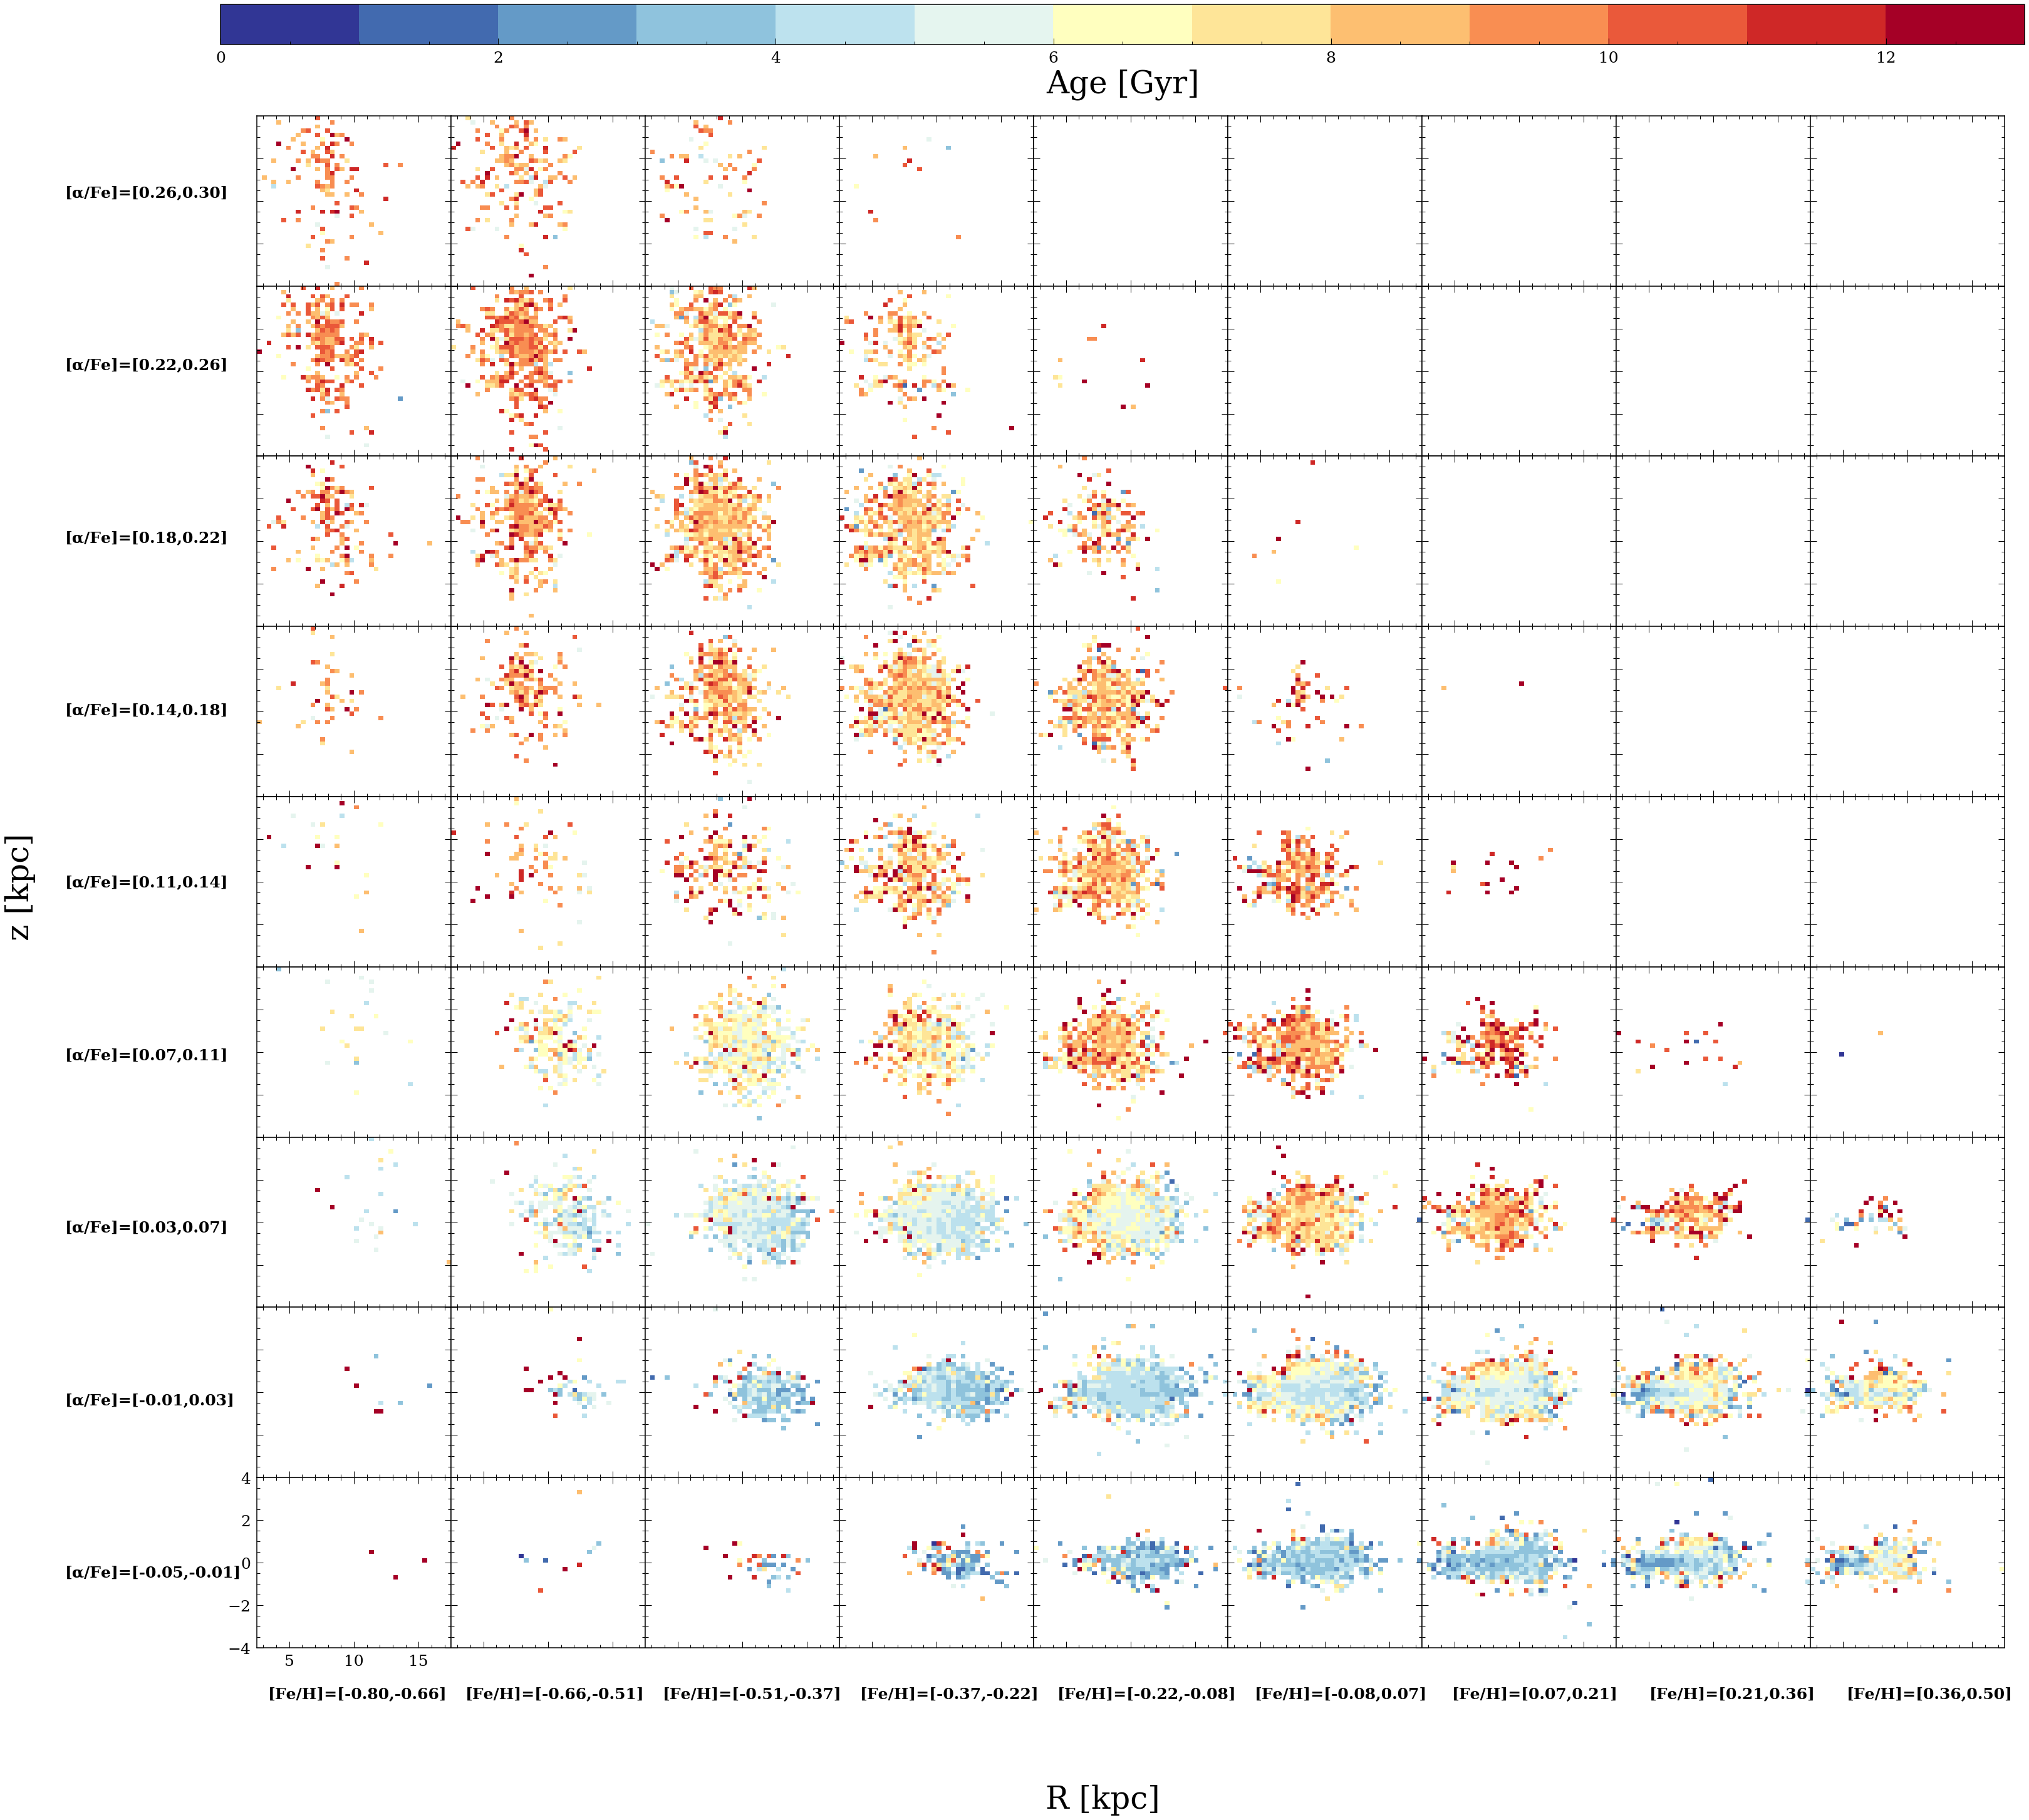

In [10]:
from scipy.ndimage import gaussian_filter

#Febin=np.linspace(-0.8,0.5,10)
#alpha=np.linspace(0.3,-0.05,10)
Febin=np.linspace(-0.8,0.5,10)
alpha=np.linspace(0.3,-0.05,10)

#plt.figure(figsize=(len(Febin)*10-10,len(alpha)*10-10))

x1,x2,y1,y2 = 2.5,17.5,-4,4
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 40

#df_CM=df_CM.loc[df_CM['Age_err']<5]
print(len(df_CM))

fig, axarr = plt.subplots(len(alpha)-1,len(Febin)-1,gridspec_kw={'hspace': 0, 'wspace': 0},
                          figsize=(len(Febin)*5,len(alpha)*5-5))
count=0

for i in range(len(alpha)-1):
    print(i/(len(alpha)-1))
    clear_output(wait = True)
    
    df_all=df_CM.loc[df_CM['ALPHA_M']>alpha[i+1]]
    df_all=df_all.loc[df_all['ALPHA_M']<alpha[i]]
    #print(len(df_all))
    
    for j in trange(len(Febin)-1):
        df_all_z=df_all.loc[(df_all['M_H'])>Febin[j]]
        df_all_z=df_all_z.loc[(df_all_z['M_H'])<Febin[j+1]]
        
        #print(len(df_all_z))
        image=makeagemap_each(df_all_z['R'].values,df_all_z['z'].values,
                df_all_z['Age'].values,lims, binnum)
        
        
        cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
        cmap1.set_bad('white',1.)
    
        x1m,x2m,y1m,y2m = lims[0], lims[1], lims[2], lims[3]
        
        im=axarr[i,j].imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
                   extent = (x1m,x2m, y1m,y2m),cmap=cmap1, vmin=0,vmax=13)
 
        count=count+1
        if i!=len(alpha)-2 or j!=0:
            axarr[i,j].set_yticklabels([])
            axarr[i,j].set_xticklabels([])
        #plt.subplots_adjust(bottom=0.20)
        #plt.xlabel("R [kpc]",fontsize = 20,labelpad =5)
        #plt.ylabel("z [kpc]" ,fontsize = 20)
    
        #cb=plt.colorbar(orientation = 'horizontal', shrink=.75)
        #fs = 20
        #cb.set_label('Age [Gyr]',fontsize = fs,labelpad = 5)
        #fs = 30 
        
        plt.xlim(x1m,x2m)
        plt.ylim(y1m,y2m)

        #count=count+1
        #plt.title('%.2f<[Fe/H]<%.2f,%.2f<[$\\alpha$/Fe]<%.2f'%(Febin[j],Febin[j+1],alpha[i+1],alpha[i]),fontsize=25)
        #plt.tight_layout()
cb_ax = fig.add_axes([0.109, 0.915, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
car = cbar.set_label('Age [Gyr]',fontsize = 50,labelpad = 5)


fig.text(0.02, 0.5, 'z [kpc]', ha='center', va='center', rotation='vertical',fontsize=50)
fig.text(0.5, 0.05, 'R [kpc]', ha='center', va='center', rotation='horizontal',fontsize=50)

for i in range(10-1):
    fig.text(0.04, 0.16+0.085*i, '[α/Fe]=[%.2f,%.2f]'%(0.3-alpha[i]-0.05,0.3-alpha[i+1]-0.05), rotation='horizontal',
             fontsize=25, fontweight='bold')
    fig.text(0.13+0.0875*i, 0.1, '[Fe/H]=[%.2f,%.2f]'%(Febin[i],Febin[i+1]), rotation='horizontal',
             fontsize=25, fontweight='bold')
        


plt.savefig('monofealpha.png')


16416 47983


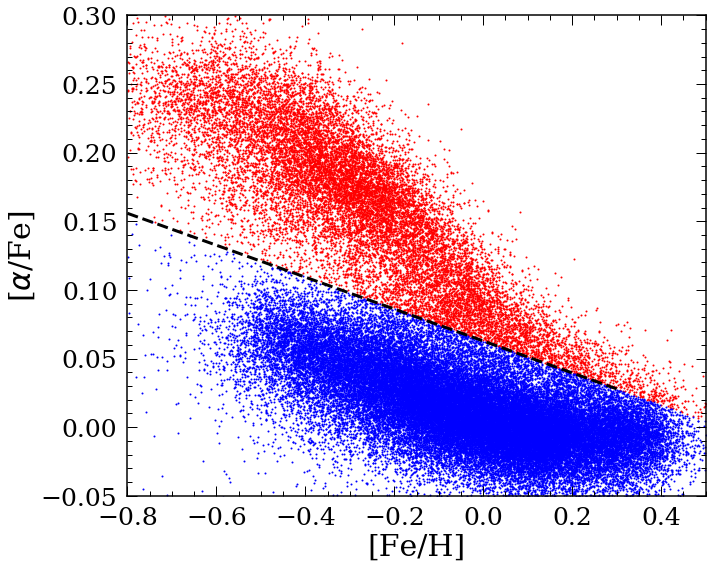

In [13]:
p=fitpoints([-0.75,0.11],[0.15,0.05])

plt.figure(figsize=(10,8))
high_alpha=df_CM[df_CM['ALPHA_M']-p(df_CM['M_H'])>=0]
low_alpha=df_CM[df_CM['ALPHA_M']-p(df_CM['M_H'])<0]
print(len(high_alpha),len(low_alpha))
plt.scatter(high_alpha['M_H'],high_alpha['ALPHA_M'],c='r',s=1)
plt.scatter(low_alpha['M_H'],low_alpha['ALPHA_M'],c='b',s=1)
plt.plot([-0.8,0.3],p([-0.8,0.3]),'k--',linewidth=3)
plt.xlim([-0.8,0.5])
plt.ylim([-0.05,0.3])
plt.xlabel('[Fe/H]')
plt.ylabel('[$\\alpha$/Fe]')

plt.tight_layout()
plt.savefig('allstarFealpha_ref.png')

/Users/lucy/Desktop/SecondYear/Figures/HeaderP.py:1172: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm


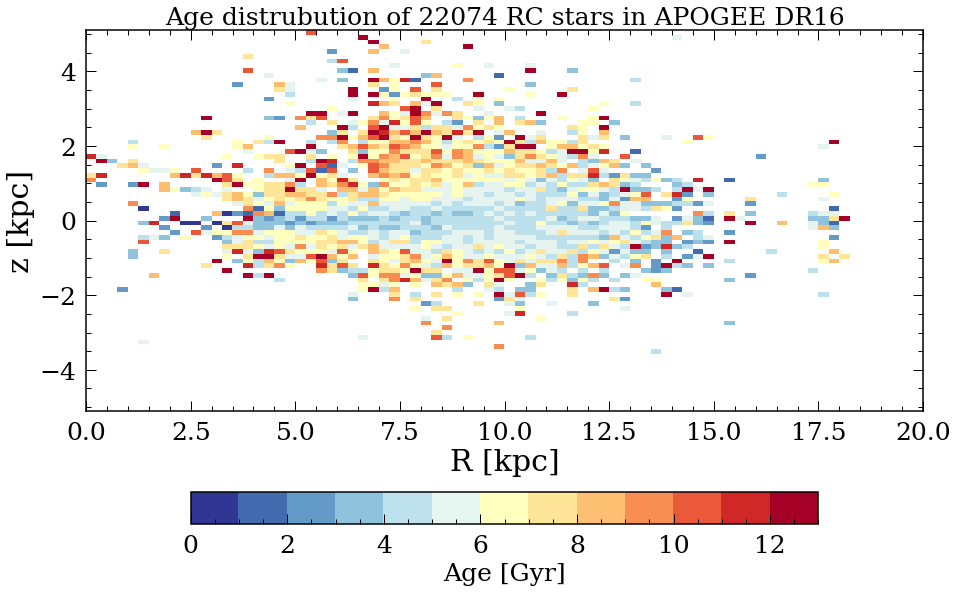

In [6]:

x1,x2,y1,y2 = 0,20,-5.1,5.1
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 80

cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
cmap1.set_bad('white',1.)

image=makeagemap_each(df_rc['R'].values,df_rc['z'].values,
                df_rc['Age'].values,lims, binnum)


plt.figure(figsize=(15,10))
plt.imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
           extent = (x1,x2, y1,y2),cmap=cmap1, vmin=0,vmax=13)
cb=plt.colorbar(orientation = 'horizontal', shrink=.75)
cb.set_label('Age [Gyr]',fontsize = 25,labelpad = 5)
plt.xlabel('R [kpc]')
plt.ylabel('z [kpc]')
plt.title('Age distrubution of %d RC stars in APOGEE DR16'%len(df_rc),fontsize=25)

plt.savefig('ageRC.png')

100%|██████████| 6/6 [00:00<00:00, 26.59it/s]


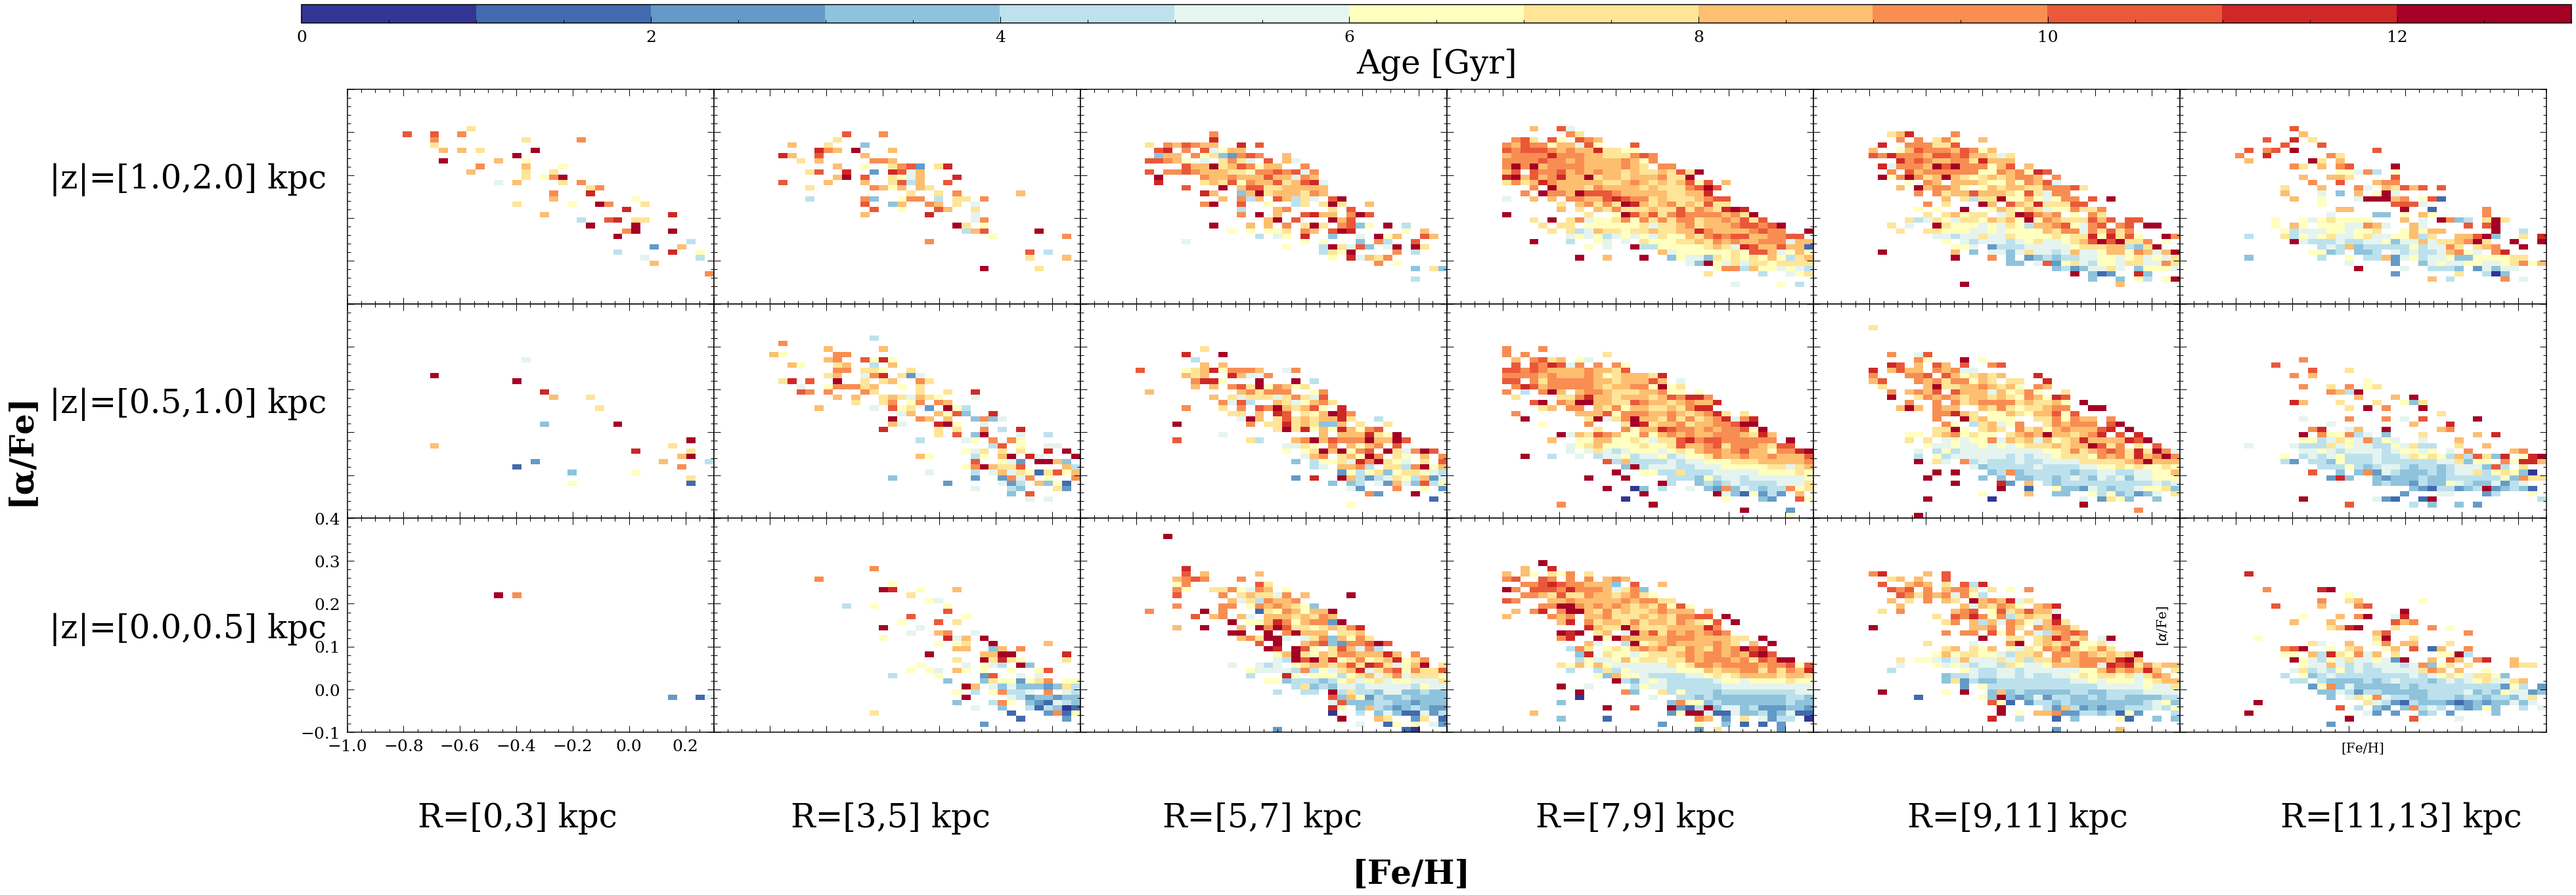

In [8]:
from scipy.ndimage import gaussian_filter

Rbin=[2,1,0.5,0]
zbin=[0,3,5,7,9,11,13]
count=1

x1,x2,y1,y2 = -1,0.3,-0.1,0.4
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 40

fig, axarr = plt.subplots(len(Rbin)-1,len(zbin)-1,gridspec_kw={'hspace': 0, 'wspace': 0},
                          figsize=(len(zbin)*10-10,len(Rbin)*10-20))


print(len(df_CM))

for i in range(len(Rbin)-1):
    print(i/(len(Rbin)-1))
    clear_output(wait = True)
    
    df_all=df_CM.loc[df_CM['z']>Rbin[i+1]]
    df_all=df_all.loc[df_all['z']<Rbin[i]]
        
    for j in trange(len(zbin)-1):
        df_all_z=df_all.loc[abs(df_all['R'])>zbin[j]]
        df_all_z=df_all_z.loc[abs(df_all_z['R'])<zbin[j+1]]
        
        
        image=makeagemap_each(df_all_z['M_H'].values,df_all_z['ALPHA_M'].values,
                df_all_z['Age'].values,lims, binnum)
        
        
        cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
        cmap1.set_bad('white',1.)
    
        x1m,x2m,y1m,y2m = lims[0], lims[1], lims[2], lims[3]
        
        im=axarr[i,j].imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
                   extent = (x1m,x2m, y1m,y2m),cmap=cmap1, vmin=0,vmax=13)
 
        if i!=(len(Rbin)-2) or j!=0:
            axarr[i,j].set_yticklabels([])
            axarr[i,j].set_xticklabels([])
        plt.subplots_adjust(bottom=0.20)
        plt.xlabel("[Fe/H]",fontsize = 20,labelpad =5)
        plt.ylabel("[$\\alpha$/Fe]" ,fontsize = 20)
    
        #cb=plt.colorbar(orientation = 'horizontal', shrink=.75)
        #fs = 20
        #cb.set_label('Age [Gyr]',fontsize = fs,labelpad = 5)
        #fs = 30 
        
        plt.xlim(x1m,x2m)
        plt.ylim(y1m,y2m)

        count=count+1

cb_ax = fig.add_axes([0.109, 0.95, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
car = cbar.set_label('Age [Gyr]',fontsize = 50,labelpad = 5)

fig.text(0.01, 0.5, '[α/Fe]', ha='center', va='center', rotation='vertical',fontsize=50, fontweight='bold')
fig.text(0.5, 0.05, '[Fe/H]', ha='center', va='center', rotation='horizontal',fontsize=50, fontweight='bold')


for i in range(3):
    fig.text(0.02, 0.776-0.085*i*2.8, '|z|=[%.1f,%.1f] kpc'%(Rbin[i+1],Rbin[i]), rotation='horizontal',
             fontsize=50)
for i in range(6):
    fig.text(0.15+0.0875*i*1.5, 0.1, 'R=[%d,%d] kpc'%(zbin[i],zbin[i+1]), rotation='horizontal',
             fontsize=50)
    
plt.savefig('agespacial.png')

In [95]:
Rbin

[2, 1, 0.5, 0]

16416 47983


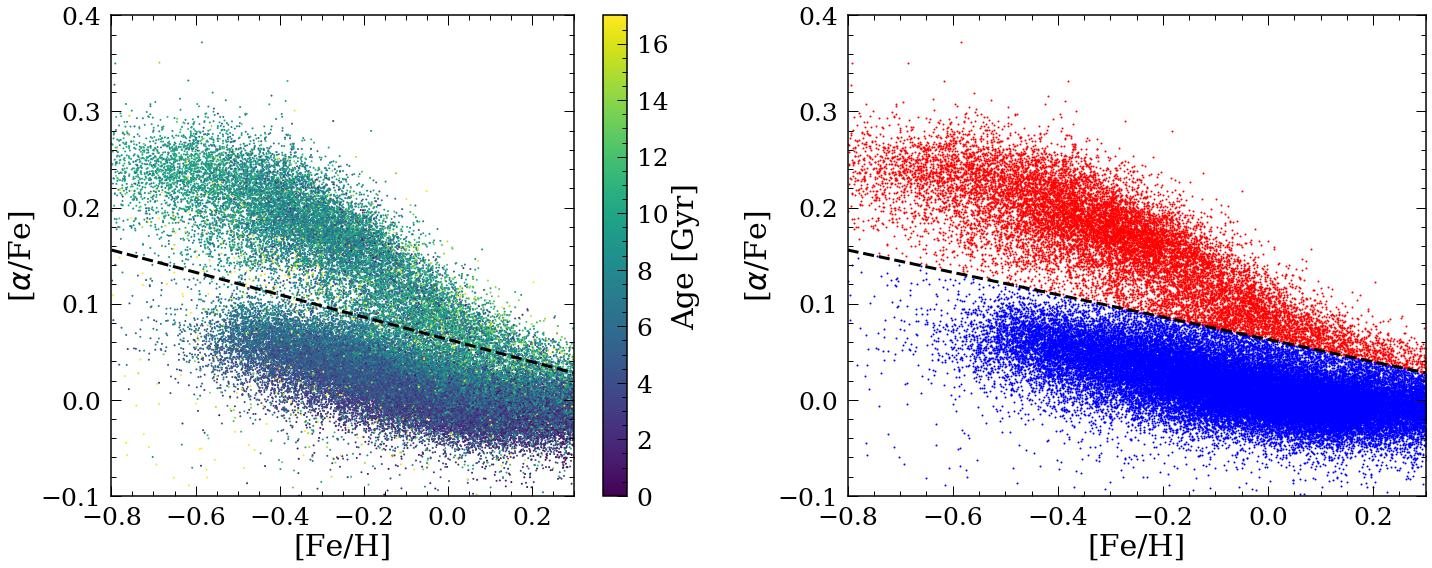

In [20]:
p=fitpoints([-0.75,0.11],[0.15,0.05])

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
cm = plt.cm.get_cmap('viridis',5)
plt.scatter(df_CM['M_H'],df_CM['ALPHA_M'],c=df_CM['Age'],vmin=0,vmax=17,s=1)
plt.plot([-0.8,0.3],p([-0.8,0.3]),'k--',linewidth=3)
plt.xlim([-0.8,0.3])
plt.ylim([-0.1,0.4])
plt.xlabel('[Fe/H]')
plt.ylabel('[$\\alpha$/Fe]')
cb=plt.colorbar()
cb.set_label('Age [Gyr]')


high_alpha=df_CM[df_CM['ALPHA_M']-p(df_CM['M_H'])>=0]
low_alpha=df_CM[df_CM['ALPHA_M']-p(df_CM['M_H'])<0]
print(len(high_alpha),len(low_alpha))
plt.subplot(1,2,2)
plt.scatter(high_alpha['M_H'],high_alpha['ALPHA_M'],c='r',s=1)
plt.scatter(low_alpha['M_H'],low_alpha['ALPHA_M'],c='b',s=1)
plt.plot([-0.8,0.3],p([-0.8,0.3]),'k--',linewidth=3)
plt.xlim([-0.8,0.3])
plt.ylim([-0.1,0.4])
plt.xlabel('[Fe/H]')
plt.ylabel('[$\\alpha$/Fe]')

plt.tight_layout()
plt.savefig('allstarFealpha.png')

In [54]:
df_rc=df_CM.loc[df_CM['DP']>230]
print(len(df_rc))
df_rc=df_rc.loc[df_rc['SNR']>150].reset_index(drop=True)
print(len(df_rc))
#df_rc=df_rc.loc[df_rc['Age_err']/df_rc['Age']<0.5].reset_index(drop=True)
print(len(df_rc))
df_rc=df_rc.loc[df_rc['M_H_ERR']<0.03].reset_index(drop=True)
print(len(df_rc))

22074
13225
13225
13225


In [22]:
#df_rc[['Age','Age_err','MG_FE','MG_FE_ERR','hi_low_line']].to_pickle('slopeinvest_Melissa.pkl')

2986 10239


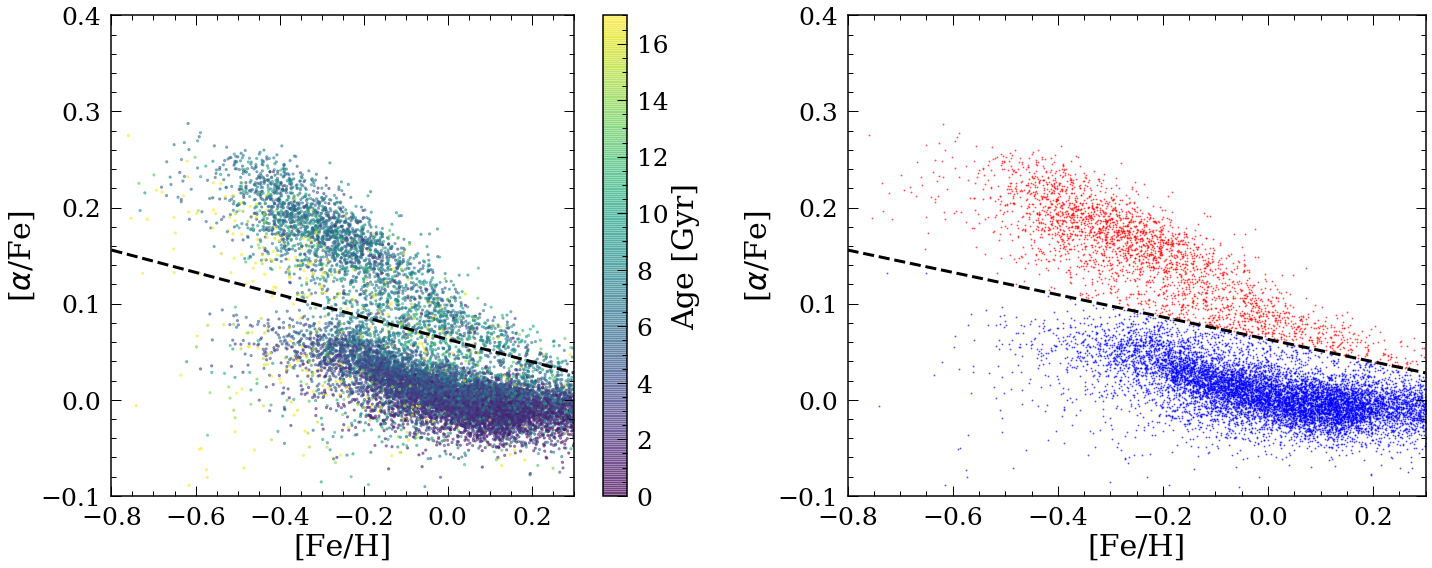

In [23]:
# only for RC stars
p=fitpoints([-0.75,0.11],[0.15,0.05])

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
cm = plt.cm.get_cmap('viridis',5)
plt.scatter(df_rc['M_H'],df_rc['ALPHA_M'],c=df_rc['Age'],vmin=0,vmax=17,alpha=0.5,s=5)
plt.plot([-0.8,0.3],p([-0.8,0.3]),'k--',linewidth=3)
plt.xlim([-0.8,0.3])
plt.ylim([-0.1,0.4])
plt.xlabel('[Fe/H]')
plt.ylabel('[$\\alpha$/Fe]')
cb=plt.colorbar()
cb.set_label('Age [Gyr]')


high_alpha=df_rc[df_rc['ALPHA_M']-p(df_rc['M_H'])>=0]
low_alpha=df_rc[df_rc['ALPHA_M']-p(df_rc['M_H'])<0]
print(len(high_alpha),len(low_alpha))

plt.subplot(1,2,2)
plt.scatter(high_alpha['M_H'],high_alpha['ALPHA_M'],c='r',alpha=0.5,s=1)
plt.scatter(low_alpha['M_H'],low_alpha['ALPHA_M'],c='b',alpha=0.5,s=1)
plt.plot([-0.8,0.3],p([-0.8,0.3]),'k--',linewidth=3)
plt.xlim([-0.8,0.3])
plt.ylim([-0.1,0.4])
plt.xlabel('[Fe/H]')
plt.ylabel('[$\\alpha$/Fe]')

plt.tight_layout()

In [53]:
#df_abun_st_ha=high_alpha.loc[abs(high_alpha['M_H'])<0.05]
#df_abun_st_la=low_alpha.loc[abs(low_alpha['M_H'])<0.05]

df_abun_st_ha=high_alpha.loc[abs(high_alpha['M_H'])<0.05]
df_abun_st_la=low_alpha.loc[abs(low_alpha['M_H'])<0.05]

df_abun_st_ha=df_abun_st_ha.loc[abs(df_abun_st_ha['Age'])<10]
df_abun_st_la=df_abun_st_la.loc[abs(df_abun_st_la['Age'])<10]

#rangeTeff=25
#tempcut=4674
#print(len(df_abun_st_ha)+len(df_abun_st_la))
#df_abun_st_ha=df_abun_st_ha.loc[abs(df_abun_st_ha['TEFF']-tempcut)<rangeTeff]
#df_abun_st_la=df_abun_st_la.loc[abs(df_abun_st_la['TEFF']-tempcut)<rangeTeff]
print(len(df_abun_st_ha),len(df_abun_st_la))

874 7160


100%|██████████| 100/100 [00:00<00:00, 128.52it/s]


(0, 10)

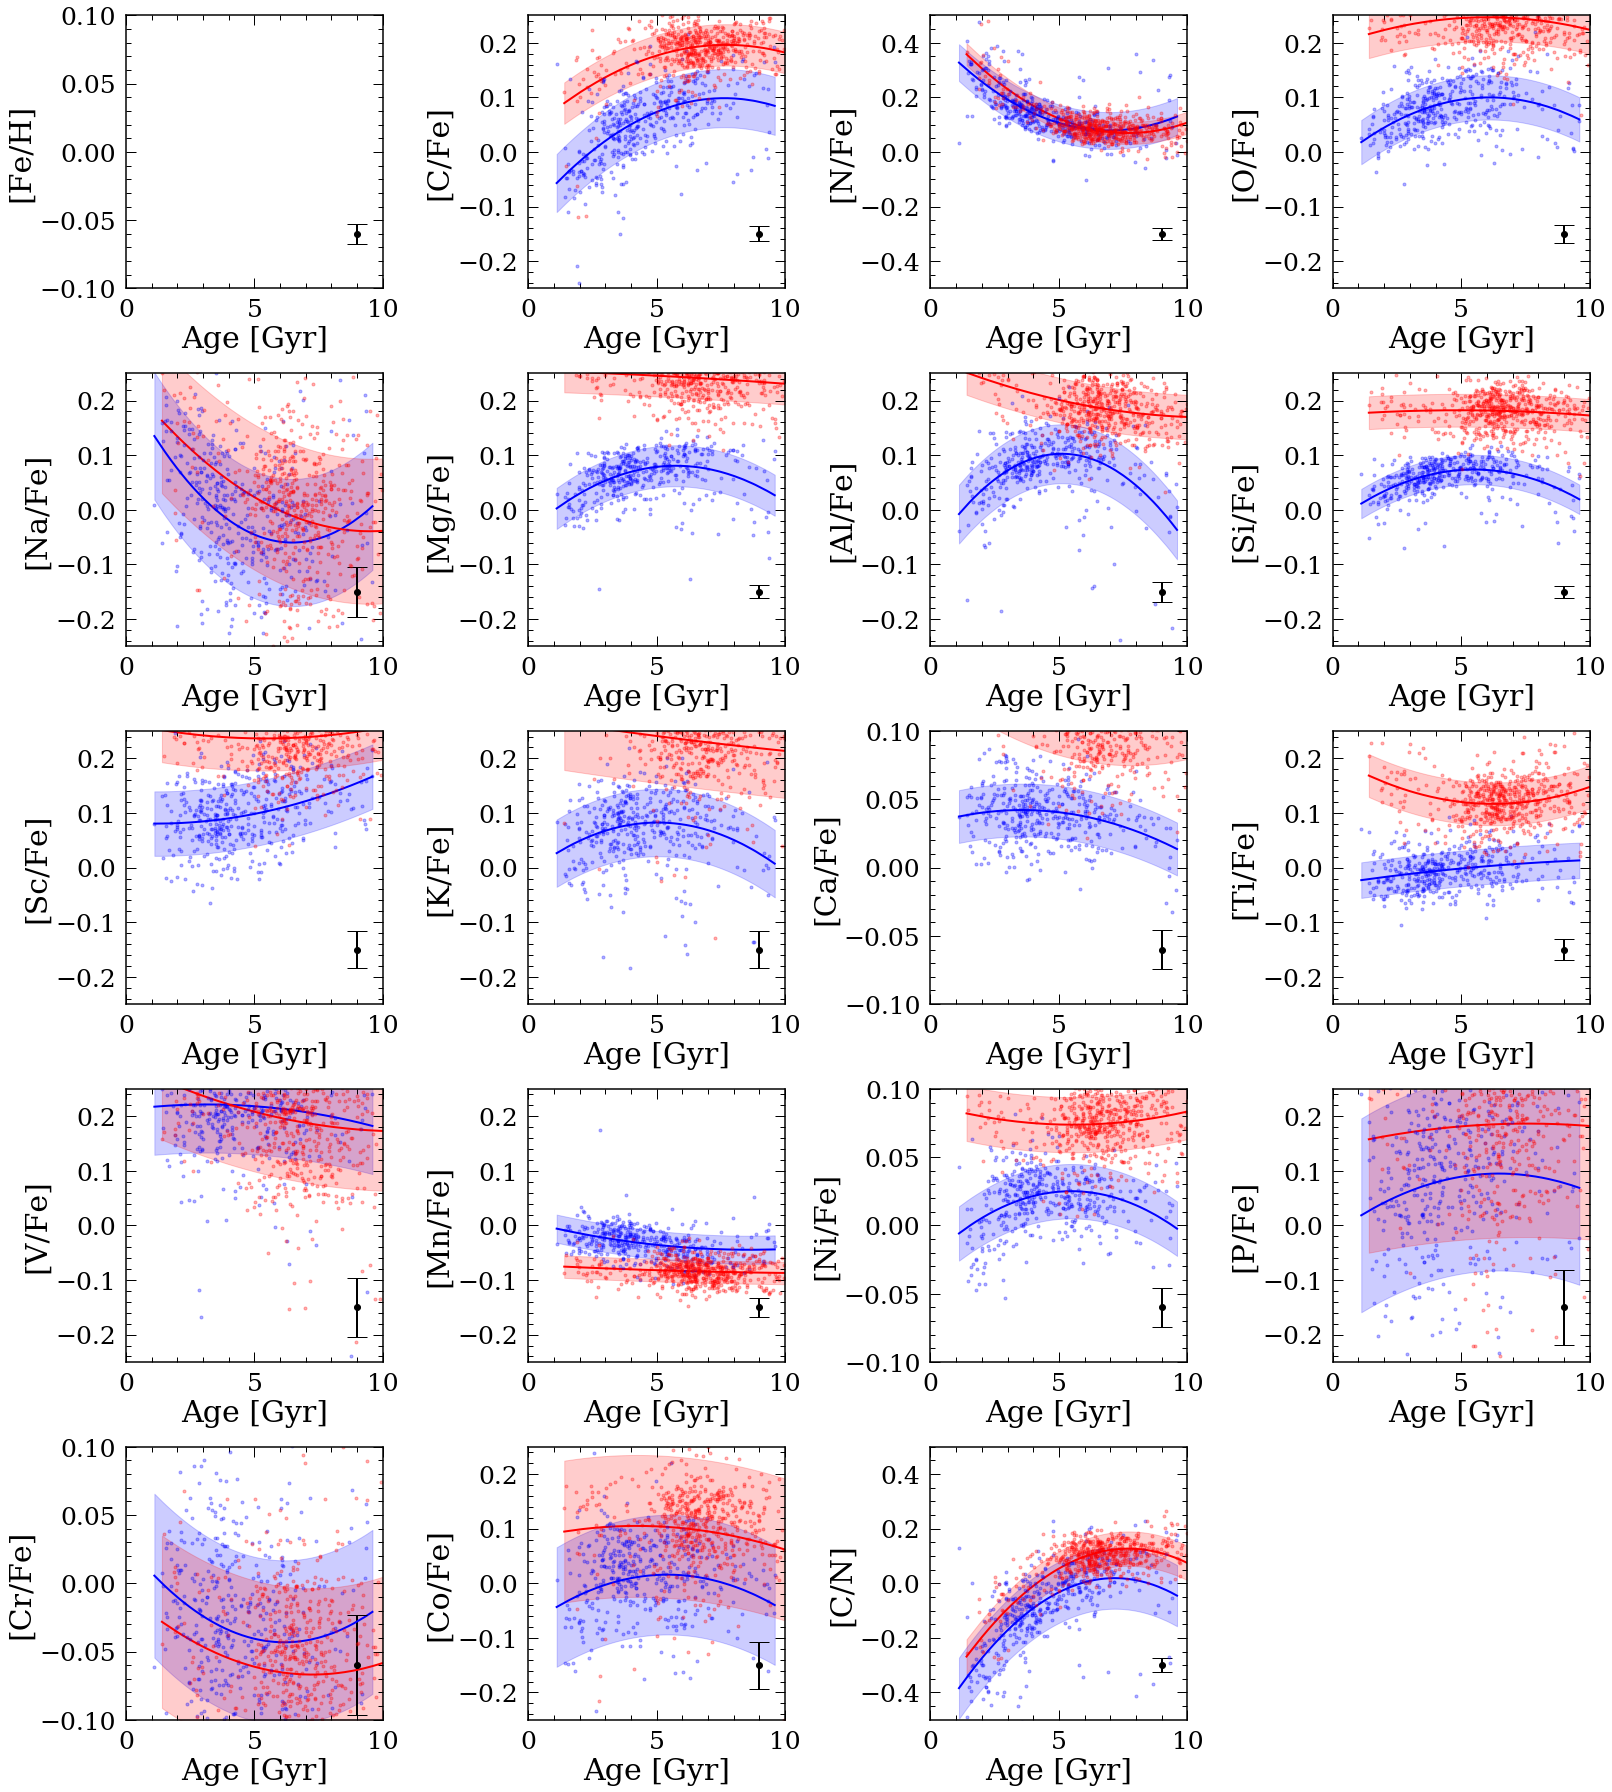

In [27]:
hi_dis, lo_dis, tot_hi_dis, tot_lo_dis, Abunname=plotTrends(df_abun_st_ha,df_abun_st_la,'abundance_rc','linear',2)
plt.xlim([0,10])

In [33]:
lo_dis

[0.055984802340171606,
 0.05833768983423499,
 0.03128160907824056,
 0.13186871887096033,
 0.03005652738479376,
 0.0402469022623988,
 0.020566756268297466,
 0.04559968696869041,
 0.0667741675199555,
 0.01956029065002904,
 0.029163717614380413,
 0.1178231507249889,
 0.02548688776556155,
 0.022782908468156542,
 0.11311422868371719,
 0.046542257495805435,
 0.07001627067120599,
 0.028948411166291932,
 0.10337873478641199]

In [38]:
lo_dis

[0.05316549395950528,
 0.06719362707931117,
 0.04048437941842799,
 0.11631195560224121,
 0.037523275694628155,
 0.05359580898888048,
 0.02689217367663633,
 0.059056015936809876,
 0.06167000701785247,
 0.01934595137592106,
 0.032570317548723124,
 0.08807682013018454,
 0.02570143539351438,
 0.019917154613721323,
 0.17753166030674056,
 0.06003456453762966,
 0.10948192898617787,
 0.027011316247129425,
 0.11136363656184124]

  0%|          | 0/100 [00:00<?, ?it/s]

C_N



100%|██████████| 100/100 [02:37<00:00,  1.58s/it]

100%|██████████| 100/100 [04:04<00:00,  2.44s/it]

100%|██████████| 100/100 [06:48<00:00,  4.08s/it]

 30%|███       | 3/10 [13:31<29:20, 251.47s/it]


100%|██████████| 100/100 [09:38<00:00,  5.78s/it]

100%|██████████| 100/100 [04:23<00:00,  2.63s/it]

 76%|███████▌  | 76/100 [01:04<00:19,  1.24it/s]


100%|██████████| 100/100 [01:25<00:00,  1.17it/s]

100%|██████████| 100/100 [00:50<00:00,  1.97it/s]

 92%|█████████▏| 92/100 [00:22<00:02,  3.54it/s]


100%|██████████| 100/100 [00:24<00:00,  4.00it/s]

100%|██████████| 100/100 [00:19<00:00,  5.10it/s]

100%|██████████| 100/100 [00:09<00:00, 10.80it/s][A

 25%|██▌       | 25/100 [00:01<00:03, 18.95it/s]


100%|██████████| 10/10 [31:26<00:00, 188.62s/it]


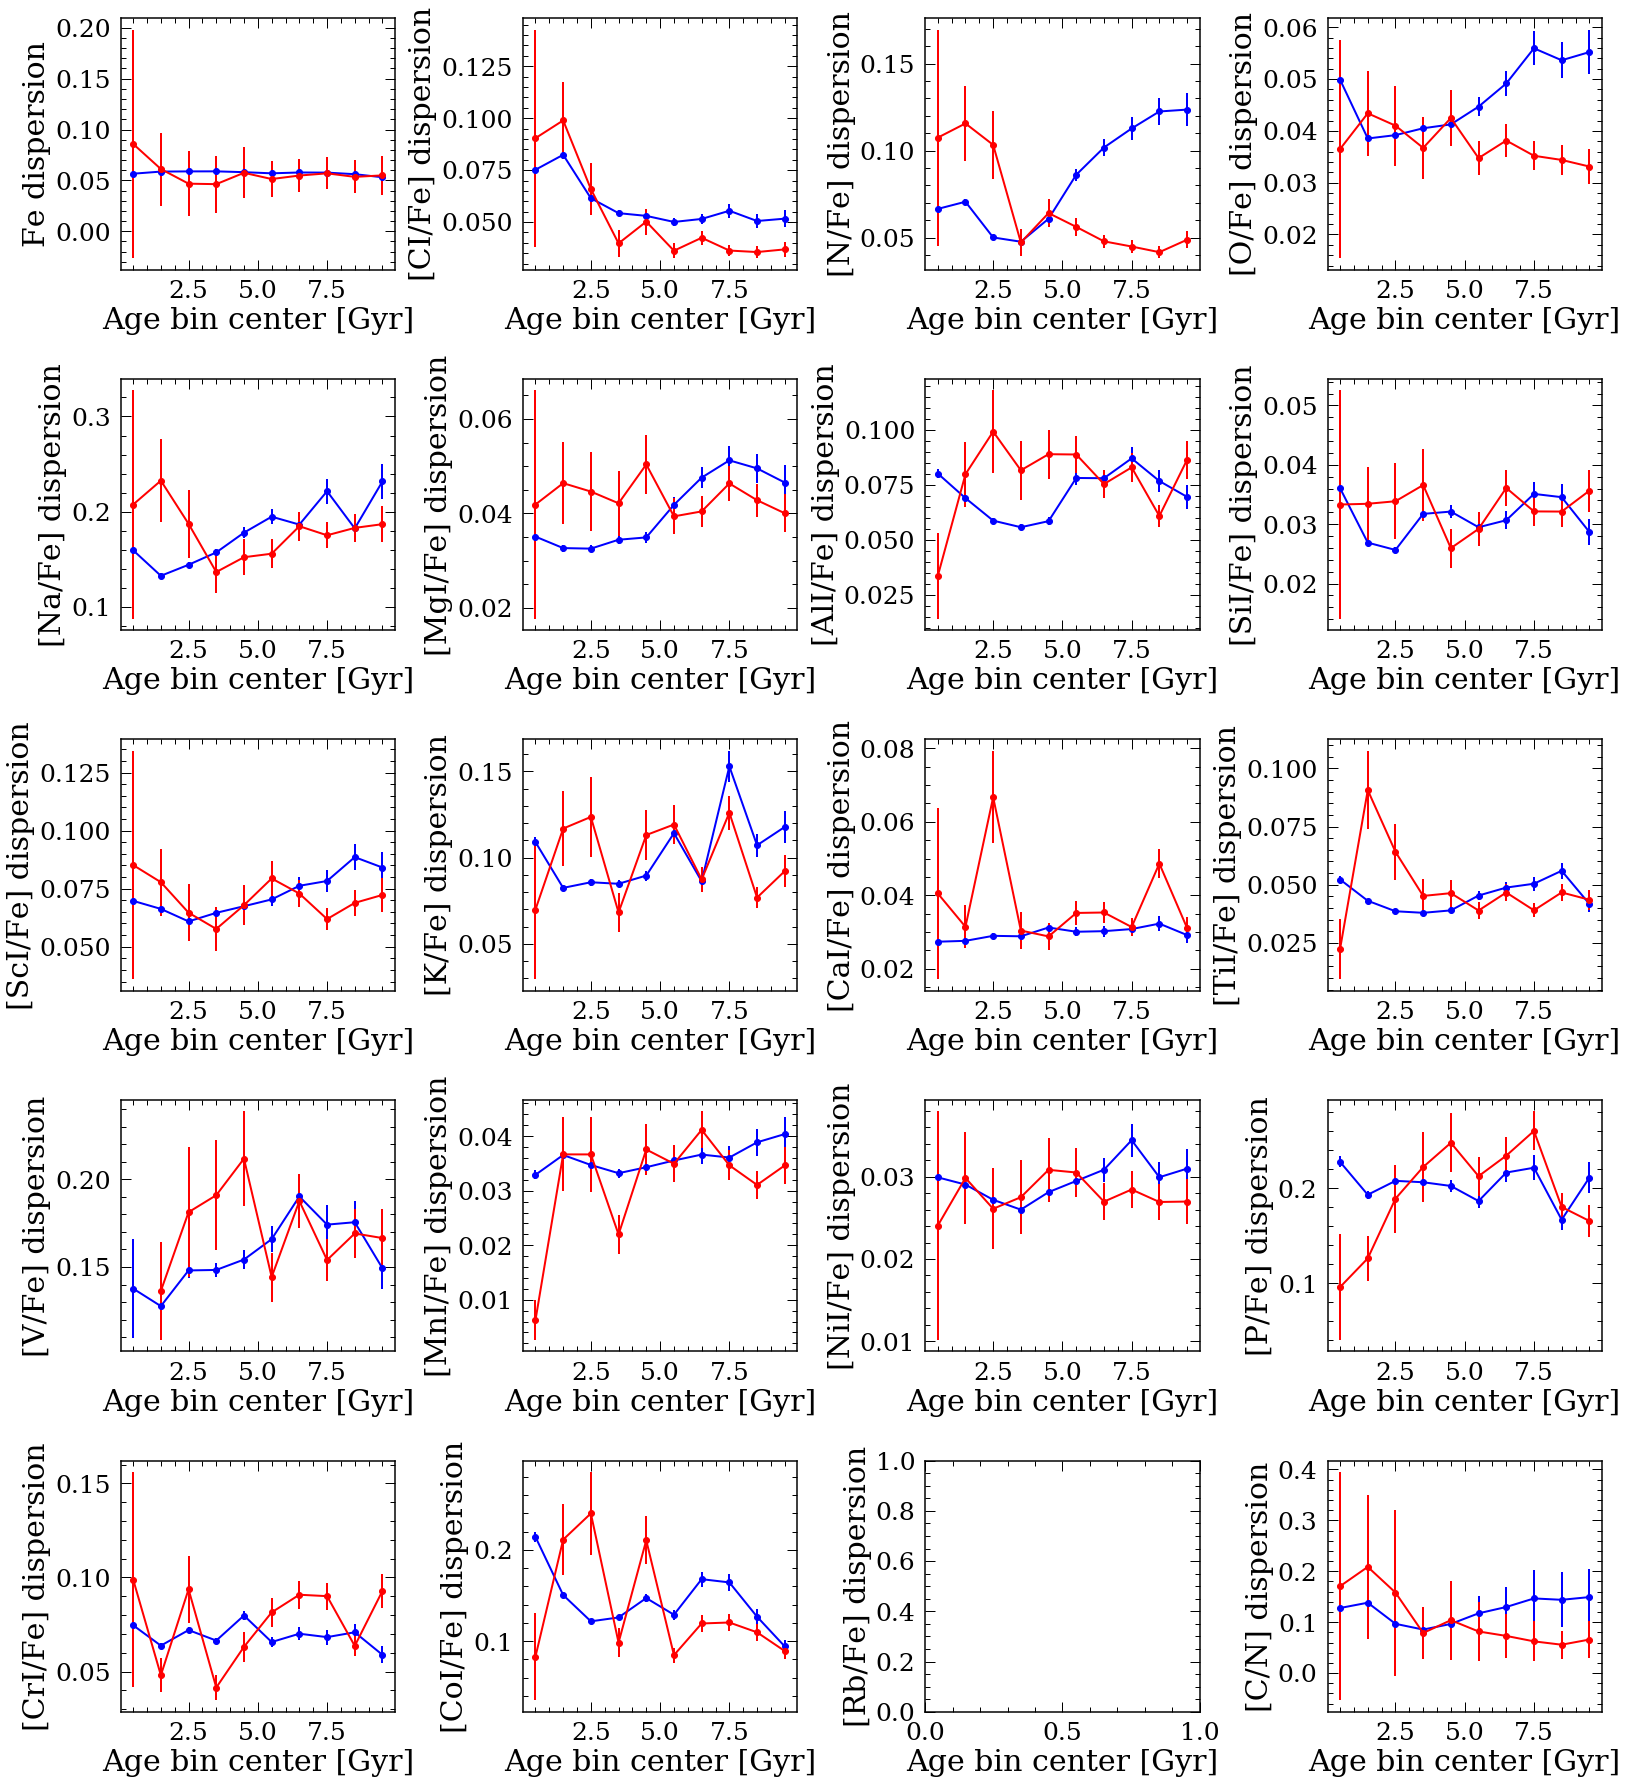

In [17]:
plotagedis(df_abun_st_ha,df_abun_st_la,1,0,10)

# Intrinsic dispersions/gradient

In [43]:
#df_disp_plot=pd.read_pickle('../intrinsic_SNR.pkl')
#df_disp_plot=pd.read_pickle('../intrinsic_notemp_8gyr.pkl')
df_disp_plot=pd.read_pickle('../intrinsic_notemp_error.pkl')

elements=['C_FE','N_FE','O_FE','NA_FE','MG_FE','AL_FE','SI_FE','S_FE','K_FE','CA_FE','TI_FE','V_FE','MN_FE','NI_FE','P_FE','CR_FE','CO_FE','M_H','C_N']
ha_err=[]
la_err=[]
df_abun_st_ha['C_N_ERR']=np.sqrt(df_abun_st_ha['C_FE_ERR']**2+df_abun_st_ha['N_FE_ERR']**2)
df_abun_st_la['C_N_ERR']=np.sqrt(df_abun_st_la['C_FE_ERR']**2+df_abun_st_la['N_FE_ERR']**2)
for i in elements:
    df_abun_st_ha=df_abun_st_ha.loc[df_abun_st_ha[i+"_ERR"]>0]
    df_abun_st_la=df_abun_st_la.loc[df_abun_st_la[i+"_ERR"]>0]
    ha_err.append(np.median(df_abun_st_ha[i+"_ERR"].dropna()))
    la_err.append(np.median(df_abun_st_la[i+"_ERR"].dropna()))

df_disp_plot['ha_err_all']=ha_err
df_disp_plot['la_err_all']=la_err



In [44]:

Ness2019=[0.07,0.011,-0.004,0.038,-0.012,-0.02,-0.031,-0.005,0.018,0.009,0.01,np.nan,-0.003,0.003,0.006,-0.001,
         np.nan,0.004,0.01]
Ness2019_err=[0.001,0.001,0.002,0.0016,0.003,0.001,0.003,0.001,0.001,0.002,0.001,np.nan,0.001,0,0.001,0.001,
             np.nan,0.001,0.001]
df_disp_plot['Ness2019']=Ness2019
df_disp_plot['Ness2019_err']=Ness2019_err

df_disp_plot

Abund  la_dis_astro  ha_dis_astro  la_dis_rc  ha_dis_rc   la_grad  \
0      K      0.068919      0.089951   0.067838   0.076331  0.011577   
1     Al      0.037635      0.049701   0.043009   0.048894  0.030206   
2      V      0.124560      0.134410   0.120013   0.131012  0.012332   
3    C/N      0.082279      0.090028   0.109878   0.074153  0.067261   
4      P      0.109705      0.110764   0.115319   0.093366  0.012566   
5      N      0.059049      0.067189   0.069874   0.050971 -0.056161   
6     Na      0.111248      0.121522   0.137444   0.134512 -0.039381   
7     Cr      0.050328      0.037921   0.046765   0.068993 -0.012743   
8      C      0.047620      0.044437   0.055357   0.037940  0.011100   
9     Co      0.064498      0.075930   0.070093   0.062954 -0.004931   
10    Mg      0.026476      0.042711   0.031649   0.032627  0.011034   
11    Fe      0.028053      0.025551   0.029138   0.027911 -0.006598   
12    Mn      0.030763      0.044177   0.026694   0.023259 -0.005918   
13    Ni      0.019517      0.021246   0.023545   0.021961  0.003947   
14    Ti      0.032541      0.039646   0.030640   0.034583 -0.009959   
15    Ca      0.020024      0.025202   0.020101   0.022829  0.001392   
16    Sc      0.051110      0.054856   0.047222   0.044151 -0.008719   
17    Si      0.020087      0.031982   0.021221   0.023074  0.004271   
18     O      0.032056      0.035908   0.032672   0.025188  0.011009   

    la_grad_err   ha_grad  ha_grad_err  la_grad_log  ...      diff  Species  \
0      0.002802 -0.048732     0.009283     0.020455  ...  0.060309      NaN   
1      0.002178 -0.021505     0.005216     0.022777  ...  0.051711       Al   
2      0.004659 -0.035805     0.012995    -0.115134  ...  0.048138        V   
3      0.006957  0.115269     0.012698     0.324333  ...  0.048008      NaN   
4      0.004960 -0.020684     0.014729     0.061808  ...  0.033250      NaN   
5      0.003644 -0.087222     0.009471    -0.210789  ...  0.031061      NaN   
6      0.004209 -0.069444     0.013415    -0.239613  ...  0.030062       Na   
7      0.002074 -0.030226     0.008952    -0.039824  ...  0.017483      NaN   
8      0.003679  0.028047     0.004356     0.113544  ...  0.016947        C   
9      0.002719 -0.021645     0.009366     0.019073  ...  0.016713       Co   
10     0.001427 -0.002475     0.002928     0.065952  ...  0.013509       Mg   
11     0.001077 -0.015081     0.002886    -0.012901  ...  0.008483      NaN   
12     0.001393  0.001572     0.003513    -0.035783  ...  0.007490       Mn   
13     0.001317 -0.003178     0.003089     0.008105  ...  0.007125       Ni   
14     0.001521 -0.014768     0.004662     0.024865  ...  0.004809       Ti   
15     0.000850  0.005042     0.003080    -0.003596  ...  0.003650       Ca   
16     0.002101 -0.010122     0.007001     0.025149  ...  0.001403       Sc   
17     0.000965  0.004653     0.002475     0.024009  ...  0.000382       Si   
18     0.001431  0.010758     0.003678     0.066733  ...  0.000251        O   

         m   m_err       s   s_err  ha_err_all  la_err_all  Ness2019  \
0      NaN     NaN     NaN     NaN    0.010422    0.010283     0.070   
1   0.0139  0.0010  0.0156  0.0019    0.016377    0.016181     0.011   
2   0.0013  0.0007  0.0091  0.0011    0.013100    0.013028    -0.004   
3      NaN     NaN     NaN     NaN    0.040415    0.037525     0.038   
4      NaN     NaN     NaN     NaN    0.011215    0.010103    -0.012   
5      NaN     NaN     NaN     NaN    0.020271    0.017389    -0.020   
6   0.0086  0.0016  0.0273  0.0029    0.010625    0.009661    -0.031   
7      NaN     NaN     NaN     NaN    0.031468    0.027825    -0.005   
8   0.0115  0.0014  0.0394  0.0044    0.032791    0.028425     0.018   
9   0.0074  0.0011  0.0178  0.0020    0.011914    0.010734     0.009   
10  0.0099  0.0009  0.0121  0.0018    0.017056    0.015942     0.010   
11     NaN     NaN     NaN     NaN    0.048792    0.045162       NaN   
12  0.0023  0.0012  0.0206  0.0020    0.01481

In [45]:
df_disp_plot['Abund']=[i.split('I')[0] for i in df_disp_plot['Abund']]

In [46]:
m=[i for i in df_disp_plot['Abund'] if 'Na' not in i]
df_disp_plot=df_disp_plot.loc[df_disp_plot['Abund'].isin(m)]

/Users/lucy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


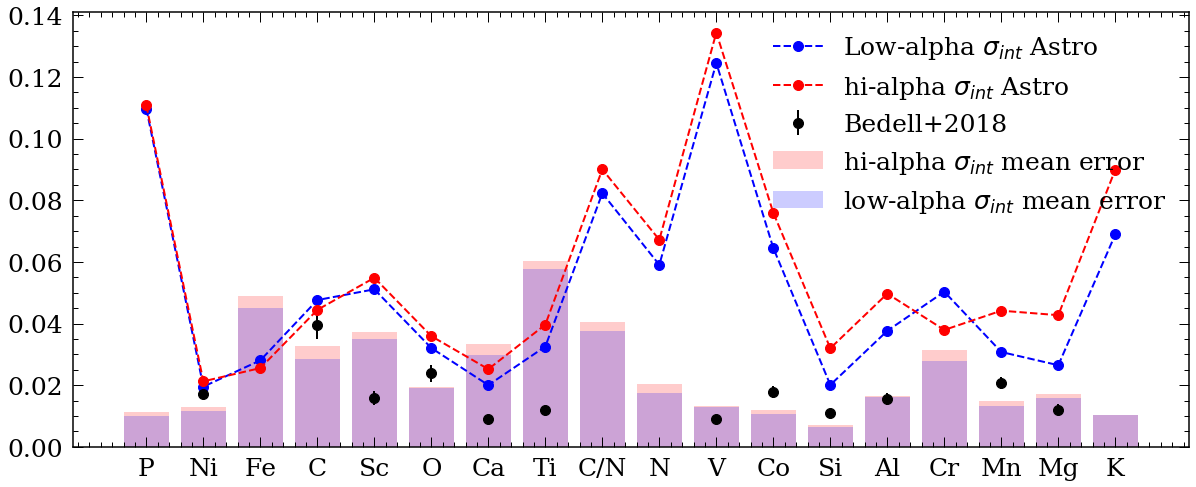

In [47]:
plt.figure(figsize=(20,8))
df_disp_plot['diff']=abs(df_disp_plot['la_dis_astro']-df_disp_plot['ha_dis_astro'])
df_disp_plot=df_disp_plot.sort_values(by='diff')
plt.plot(df_disp_plot['Abund'],df_disp_plot['la_dis_astro'],'b--o',label='Low-alpha $\sigma_{int}$ Astro',markersize=10)
plt.plot(df_disp_plot['Abund'],df_disp_plot['ha_dis_astro'],'r--o',label='hi-alpha $\sigma_{int}$ Astro',markersize=10)
plt.errorbar(df_disp_plot['Abund'],df_disp_plot['s'],yerr=df_disp_plot['s_err'],
             fmt='ko',label='Bedell+2018',markersize=10)

plt.bar(df_disp_plot['Abund'].values,df_disp_plot['ha_err_all'].values,alpha=0.2,
        color='r',label='hi-alpha $\sigma_{int}$ mean error')
plt.bar(df_disp_plot['Abund'].values,df_disp_plot['la_err_all'].values,alpha=0.2,
        color='b',label='low-alpha $\sigma_{int}$ mean error')

plt.legend()
plt.savefig('dispersion_comp_2dpoly_as.png')

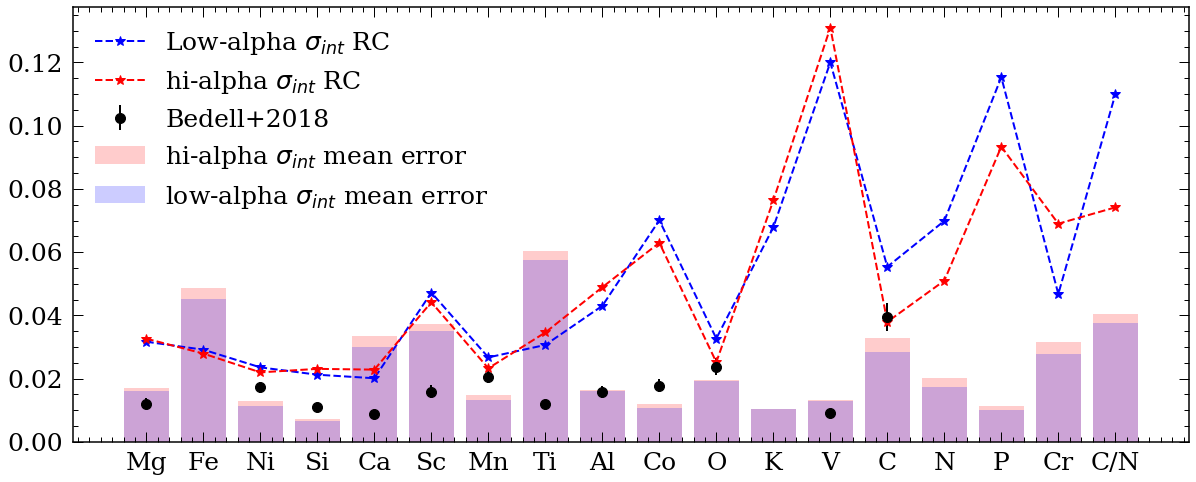

In [48]:
plt.figure(figsize=(20,8))
df_disp_plot['diff']=abs(df_disp_plot['la_dis_rc']-df_disp_plot['ha_dis_rc'])
df_disp_plot=df_disp_plot.sort_values(by='diff')
plt.plot(df_disp_plot['Abund'],df_disp_plot['la_dis_rc'],'b--*',label='Low-alpha $\sigma_{int}$ RC',markersize=10)
plt.plot(df_disp_plot['Abund'],df_disp_plot['ha_dis_rc'],'r--*',label='hi-alpha $\sigma_{int}$ RC',markersize=10)
plt.errorbar(df_disp_plot['Abund'],df_disp_plot['s'],yerr=df_disp_plot['s_err'],
             fmt='ko',label='Bedell+2018',markersize=10)


plt.bar(df_disp_plot['Abund'].values,df_disp_plot['ha_err_all'].values,alpha=0.2,
        color='r',label='hi-alpha $\sigma_{int}$ mean error')
plt.bar(df_disp_plot['Abund'].values,df_disp_plot['la_err_all'].values,alpha=0.2,
        color='b',label='low-alpha $\sigma_{int}$ mean error')

plt.legend()
plt.savefig('dispersion_comp_2dpoly_rc.png')

In [49]:
m=df_disp_plot['Abund'].isin(['C/N','V'])

df_disp_plot=df_disp_plot[~m]

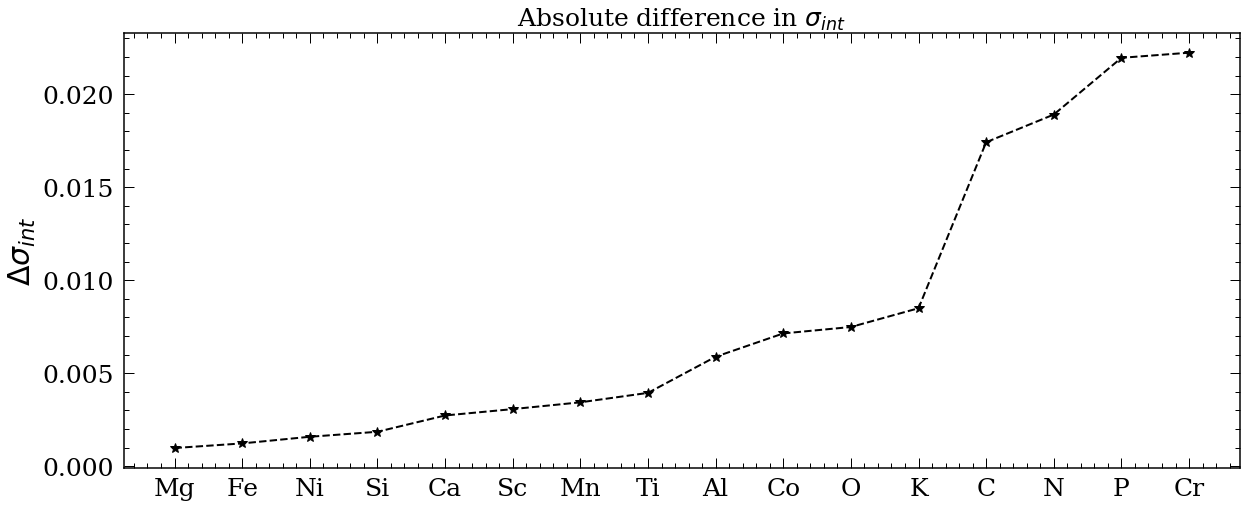

In [50]:
plt.figure(figsize=(20,8))
df_disp_plot['diff']=abs(df_disp_plot['la_dis_rc']-df_disp_plot['ha_dis_rc'])
df_disp_plot=df_disp_plot.sort_values(by='diff')
plt.plot(df_disp_plot['Abund'],df_disp_plot['diff'],'k--*',markersize=10)
plt.ylabel('$\Delta \sigma_{int}$')
plt.title('Absolute difference in $\sigma_{int}$', fontsize=25)
plt.savefig('dispersion_comp_2dpoly_rc.png')


/Users/lucy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/lucy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/lucy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0.039151364438340774 0.036343013223504333


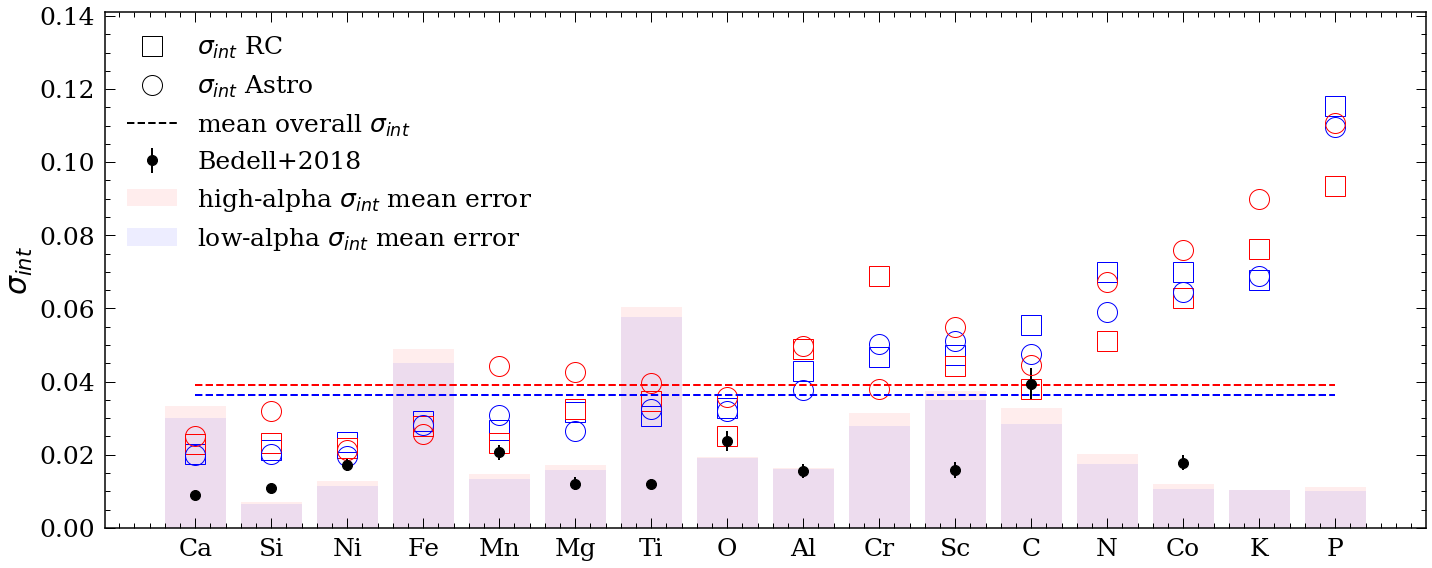

In [51]:
df_disp_plot=df_disp_plot.reset_index(drop=True)
df_disp_plot['disp_ave_hi']=(df_disp_plot['ha_dis_rc']+df_disp_plot['ha_dis_astro'])/2.
df_disp_plot['disp_ave_la']=(df_disp_plot['la_dis_rc']+df_disp_plot['la_dis_astro'])/2.
haave=df_disp_plot['disp_ave_hi']
haave[0]=df_disp_plot['ha_dis_rc'].iloc[0]
haave[1]=df_disp_plot['ha_dis_rc'].iloc[1]
haave[13]=df_disp_plot['ha_dis_rc'].iloc[13]
df_disp_plot['disp_ave_hi']=haave

plt.figure(figsize=(20,8))

df_disp_plot=df_disp_plot.sort_values(by='disp_ave_la')

plt.plot(df_disp_plot['Abund'],df_disp_plot['la_dis_rc'],'bs',fillstyle='none',markersize=20)
plt.plot(df_disp_plot['Abund'],df_disp_plot['ha_dis_rc'],'rs',fillstyle='none',markersize=20)

plt.plot(df_disp_plot['Abund'],df_disp_plot['la_dis_astro'],'bo',fillstyle='none',markersize=20)
plt.plot(df_disp_plot['Abund'],df_disp_plot['ha_dis_astro'],'ro',fillstyle='none',markersize=20)

plt.errorbar(df_disp_plot['Abund'],df_disp_plot['s'],yerr=df_disp_plot['s_err'],
             fmt='ko',label='Bedell+2018',markersize=10)



# to generate simple legends
plt.plot(df_disp_plot['Abund'][0],[-1],'ks',fillstyle='none',
         label='$\sigma_{int}$ RC',markersize=20)
plt.plot(df_disp_plot['Abund'][0],[-1],'ko',fillstyle='none',
         label='$\sigma_{int}$ Astro',markersize=20)
plt.plot(df_disp_plot['Abund'][0],[-1],'k--',
         label='mean overall $\sigma_{int}$')


plt.bar(df_disp_plot['Abund'].values,df_disp_plot['ha_err_all'].values,alpha=0.07,
        color='r',label='high-alpha $\sigma_{int}$ mean error')
plt.bar(df_disp_plot['Abund'].values,df_disp_plot['la_err_all'].values,alpha=0.07,
        color='b',label='low-alpha $\sigma_{int}$ mean error')


meanhadisp=np.median(df_disp_plot['disp_ave_hi'].dropna())
meanladisp=np.median(df_disp_plot['disp_ave_la'])
print(meanhadisp,meanladisp)

plt.plot(df_disp_plot['Abund'],np.ones(len(df_disp_plot['disp_ave_hi']))*meanhadisp,'r--')
plt.plot(df_disp_plot['Abund'],np.ones(len(df_disp_plot['disp_ave_la']))*meanladisp,'b--')
plt.ylabel('$\sigma_{int}$')
plt.ylim([0,0.141])
plt.legend()
plt.tight_layout()
plt.savefig('dispersion_comp.png')

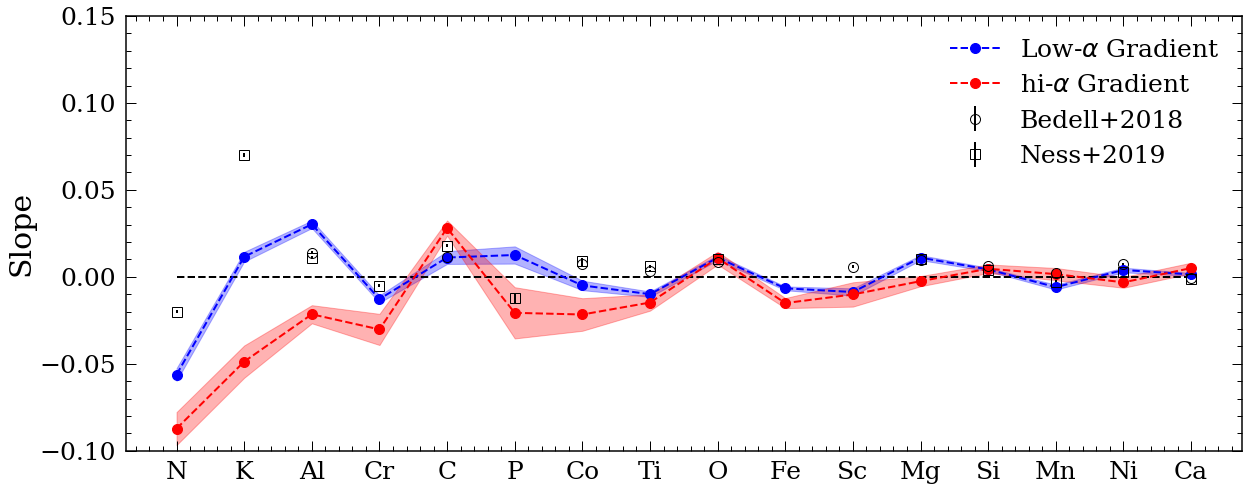

In [52]:
df_disp_plot['diff']=(abs(df_disp_plot['la_grad'])+abs(df_disp_plot['ha_grad']))/2
df_disp_plot=df_disp_plot.sort_values(by='diff',ascending=False)
plt.figure(figsize=(20,8))
plt.errorbar(df_disp_plot['Abund'],df_disp_plot['la_grad'],
             fmt='bo--',label='Low-$\\alpha$ Gradient',markersize=10)
plt.fill_between(df_disp_plot['Abund'],df_disp_plot['la_grad']-df_disp_plot['la_grad_err'],
                df_disp_plot['la_grad']+df_disp_plot['la_grad_err'],color='b',alpha=0.3)

plt.errorbar(df_disp_plot['Abund'],df_disp_plot['ha_grad'],
             fmt='ro--',label='hi-$\\alpha$ Gradient',markersize=10)
plt.fill_between(df_disp_plot['Abund'],df_disp_plot['ha_grad']-df_disp_plot['ha_grad_err'],
                df_disp_plot['ha_grad']+df_disp_plot['ha_grad_err'],color='r',alpha=0.3)

plt.errorbar(df_disp_plot['Abund'],df_disp_plot['m'],yerr=df_disp_plot['m_err'],
             fmt='ko',label='Bedell+2018',markersize=10,markerfacecolor='none')

plt.errorbar(df_disp_plot['Abund'],df_disp_plot['Ness2019'],yerr=df_disp_plot['Ness2019_err'],
             fmt='ks',label='Ness+2019',markersize=10,markerfacecolor='none')

plt.plot(df_disp_plot['Abund'],np.zeros(len(df_disp_plot['Abund'])),'k--')

plt.ylim([-0.1,0.15])
plt.ylabel('Slope')
plt.legend()
plt.savefig('slopes.png')

# Fe-age

In [8]:
df_CM=pd.read_pickle('../CannonDR16_cut.pkl')

In [14]:
check='DP'
print(max(df_CM[check]),min(df_CM[check]))

504.7023609770504 -68.90815173872488


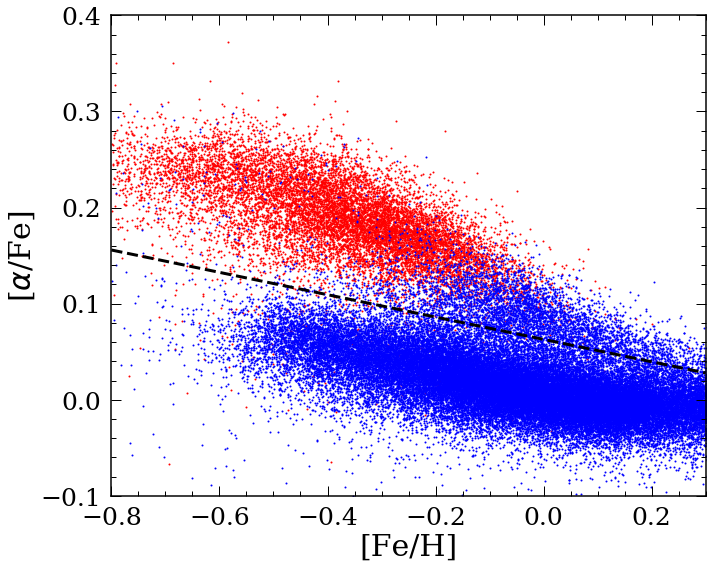

In [15]:
plt.figure(figsize=(10,8))
plt.scatter(df_CM.loc[df_CM['hi_low']==1]['M_H'],df_CM.loc[df_CM['hi_low']==1]['ALPHA_M'],c='r',s=1)
plt.scatter(df_CM.loc[df_CM['hi_low']==0]['M_H'],df_CM.loc[df_CM['hi_low']==0]['ALPHA_M'],c='b',s=1)
plt.plot([-0.8,0.3],p([-0.8,0.3]),'k--',linewidth=3)
plt.xlim([-0.8,0.3])
plt.ylim([-0.1,0.4])
plt.xlabel('[Fe/H]')
plt.ylabel('[$\\alpha$/Fe]')

plt.tight_layout()
plt.savefig('allstarFealpha_cluster.png')

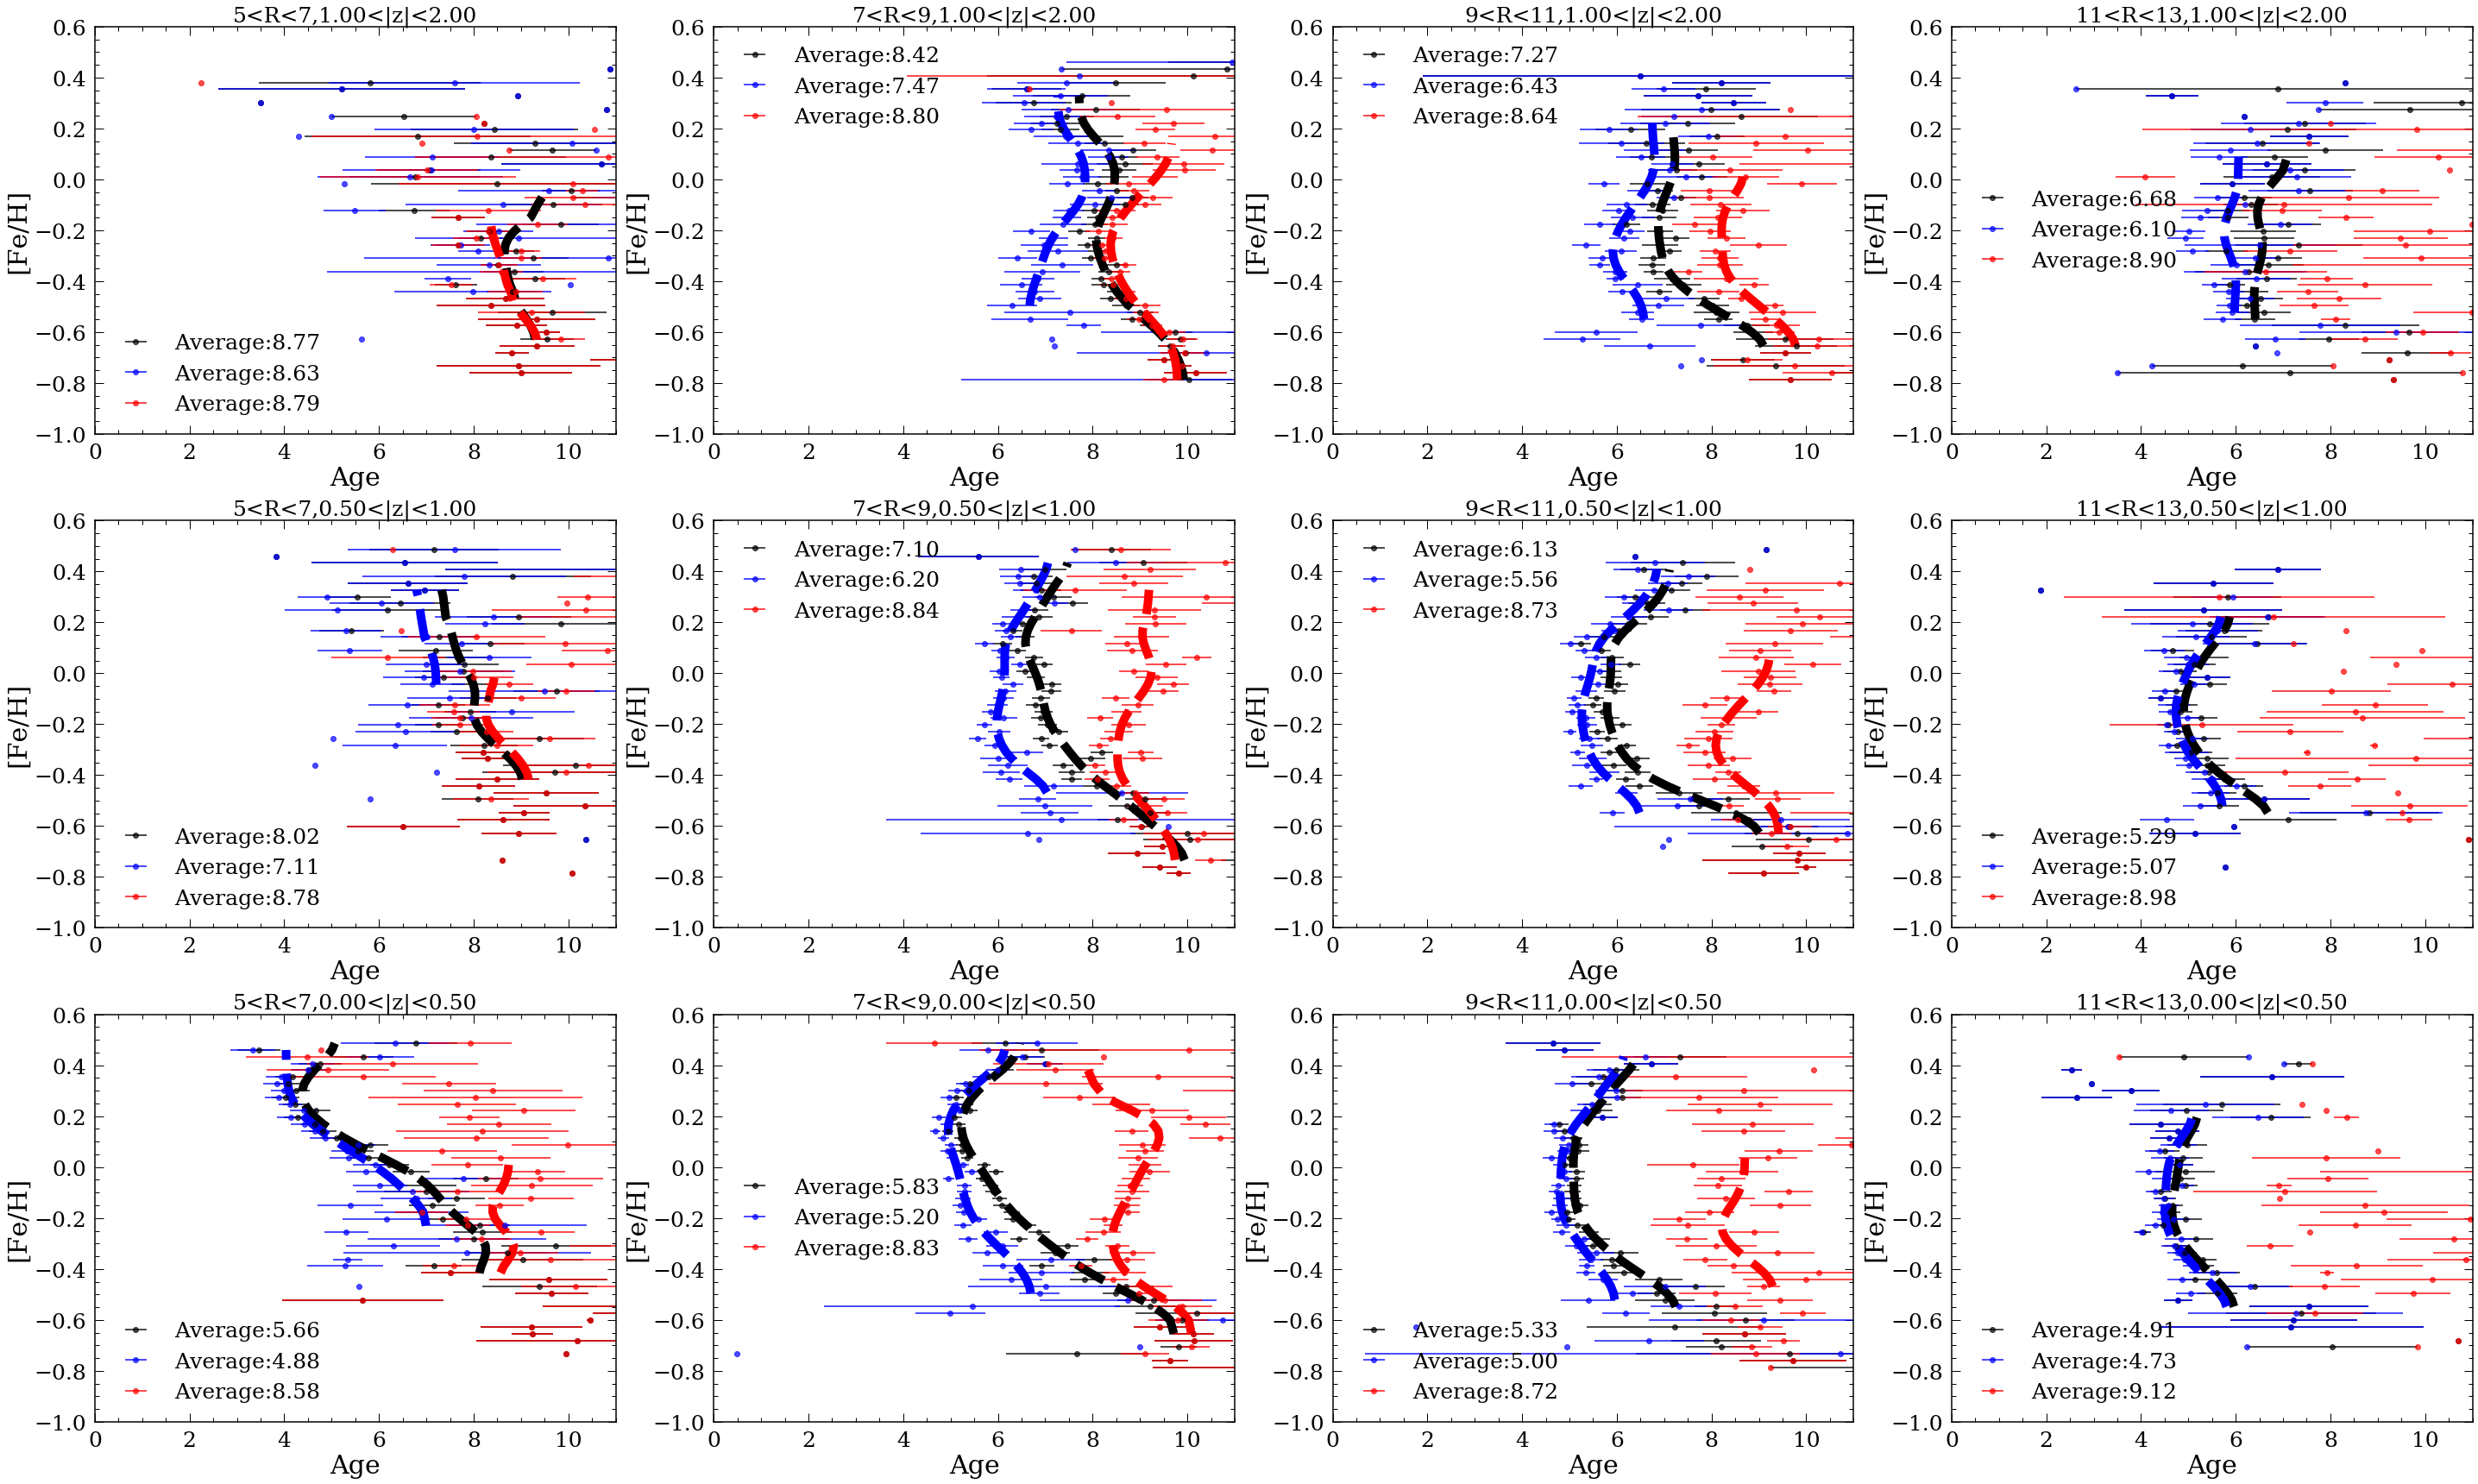

In [16]:
#Rbin=[5,7,9,11,13]
#zbin=[0,0.5,1,2]
#Rbin=[2,1,0.5,0]
Rbin=[2,1,0.5,0]
#zbin=[5,7,9,11,13]
zbin=[5,7,9,11,13]
plt.figure(figsize=(40,24))
count=1
for i in range(len(Rbin)-1):
    df_all=df_CM.loc[df_CM['z']>Rbin[i+1]]
    df_all=df_all.loc[df_all['z']<Rbin[i]]
        
    for j in range(len(zbin)-1):
        df_all_z=df_all.loc[abs(df_all['R'])>zbin[j]]
        df_all_z=df_all_z.loc[abs(df_all_z['R'])<zbin[j+1]]
        
        df_all_z=df_all_z.dropna(subset=['M_H','Age'])
        
        ha_bin_z=df_all_z[df_all_z['ALPHA_M']-p(df_all_z['M_H'])>=0]
        la_bin_z=df_all_z[df_all_z['ALPHA_M']-p(df_all_z['M_H'])<0]
        
        #meanfeh,meanage,meanage_err,starnumb=getave_age(df_all_z['Age'].values,df_all_z['M_H'].values)
        allage=np.append(la_bin_z['Age'].values,ha_bin_z['Age'].values)
        allmh=np.append(la_bin_z['M_H'].values,ha_bin_z['M_H'].values)
        meanfeh,meanage,meanage_err,starnumb=getave_age(allage,allmh)
        
        meanfeh_la,meanage_la,meanage_err_la,starnumb_la=getave_age(la_bin_z['Age'].values,
                                                                    la_bin_z['M_H'].values)
        meanfeh_ha,meanage_ha,meanage_err_ha,starnumb_ha=getave_age(ha_bin_z['Age'].values,
                                                                    ha_bin_z['M_H'].values)
        
        
        
        clear_output(wait = True)
        plt.subplot(3,4,count)
        
        m=(meanfeh!=0)
        meanfeh,meanage,meanage_err,starnumb=meanfeh[m],meanage[m],meanage_err[m],starnumb[m]
        m2=starnumb>10
        filterage=gaussian_filter(meanage[m2], sigma=3)
        plt.plot(filterage,meanfeh[m2],'k--',linewidth=10)
        
        m=(meanfeh_la!=0)
        meanfeh_la,meanage_la,meanage_err_la,starnumb_la=meanfeh_la[m],meanage_la[m],meanage_err_la[m],starnumb_la[m]
        m2=starnumb_la>10
        filterage=gaussian_filter(meanage_la[m2], sigma=3)
        plt.plot(filterage,meanfeh_la[m2],'b--',linewidth=10)
        
        m=(meanfeh_ha!=0)
        meanfeh_ha,meanage_ha,meanage_err_ha,starnumb_ha=meanfeh_ha[m],meanage_ha[m],meanage_err_ha[m],starnumb_ha[m]
        m2=starnumb_ha>10
        filterage=gaussian_filter(meanage_ha[m2], sigma=3)
        plt.plot(filterage,meanfeh_ha[m2],'r--',linewidth=10)
        
        plt.errorbar(meanage,meanfeh,xerr=meanage_err,fmt='ko',alpha=0.7,label='Average:%.2f'%np.mean(allage))
        plt.errorbar(meanage_la,meanfeh_la,xerr=meanage_err_la,fmt='bo',alpha=0.7,label='Average:%.2f'%np.mean(la_bin_z['Age']))
        plt.errorbar(meanage_ha,meanfeh_ha,xerr=meanage_err_ha,fmt='ro',alpha=0.7,label='Average:%.2f'%np.mean(ha_bin_z['Age']))
        #plt.xlim([0,10])
        #plt.ylim([-2,0.5])
        plt.xlabel('Age')
        plt.ylabel('[Fe/H]')
        #plt.title('All stars',fontsize=25)
        """
        if count==10:
            plt.plot([4.66],[0],'bo',markersize=30)
        """
        #plt.scatter(ha_bin['Age'],ha_bin['M_H'],c='r',alpha=0.5)
        #plt.scatter(la_bin['Age'],la_bin['M_H'],c='b',alpha=0.5)
        plt.xlim([0,11])
        plt.ylim([-1,0.6])
        plt.legend()
        count=count+1
        plt.title('%d<R<%d,%.2f<|z|<%.2f'%(zbin[j],zbin[j+1],Rbin[i+1],Rbin[i]),fontsize=25)
        plt.tight_layout()
        
plt.savefig('FeAge.png')

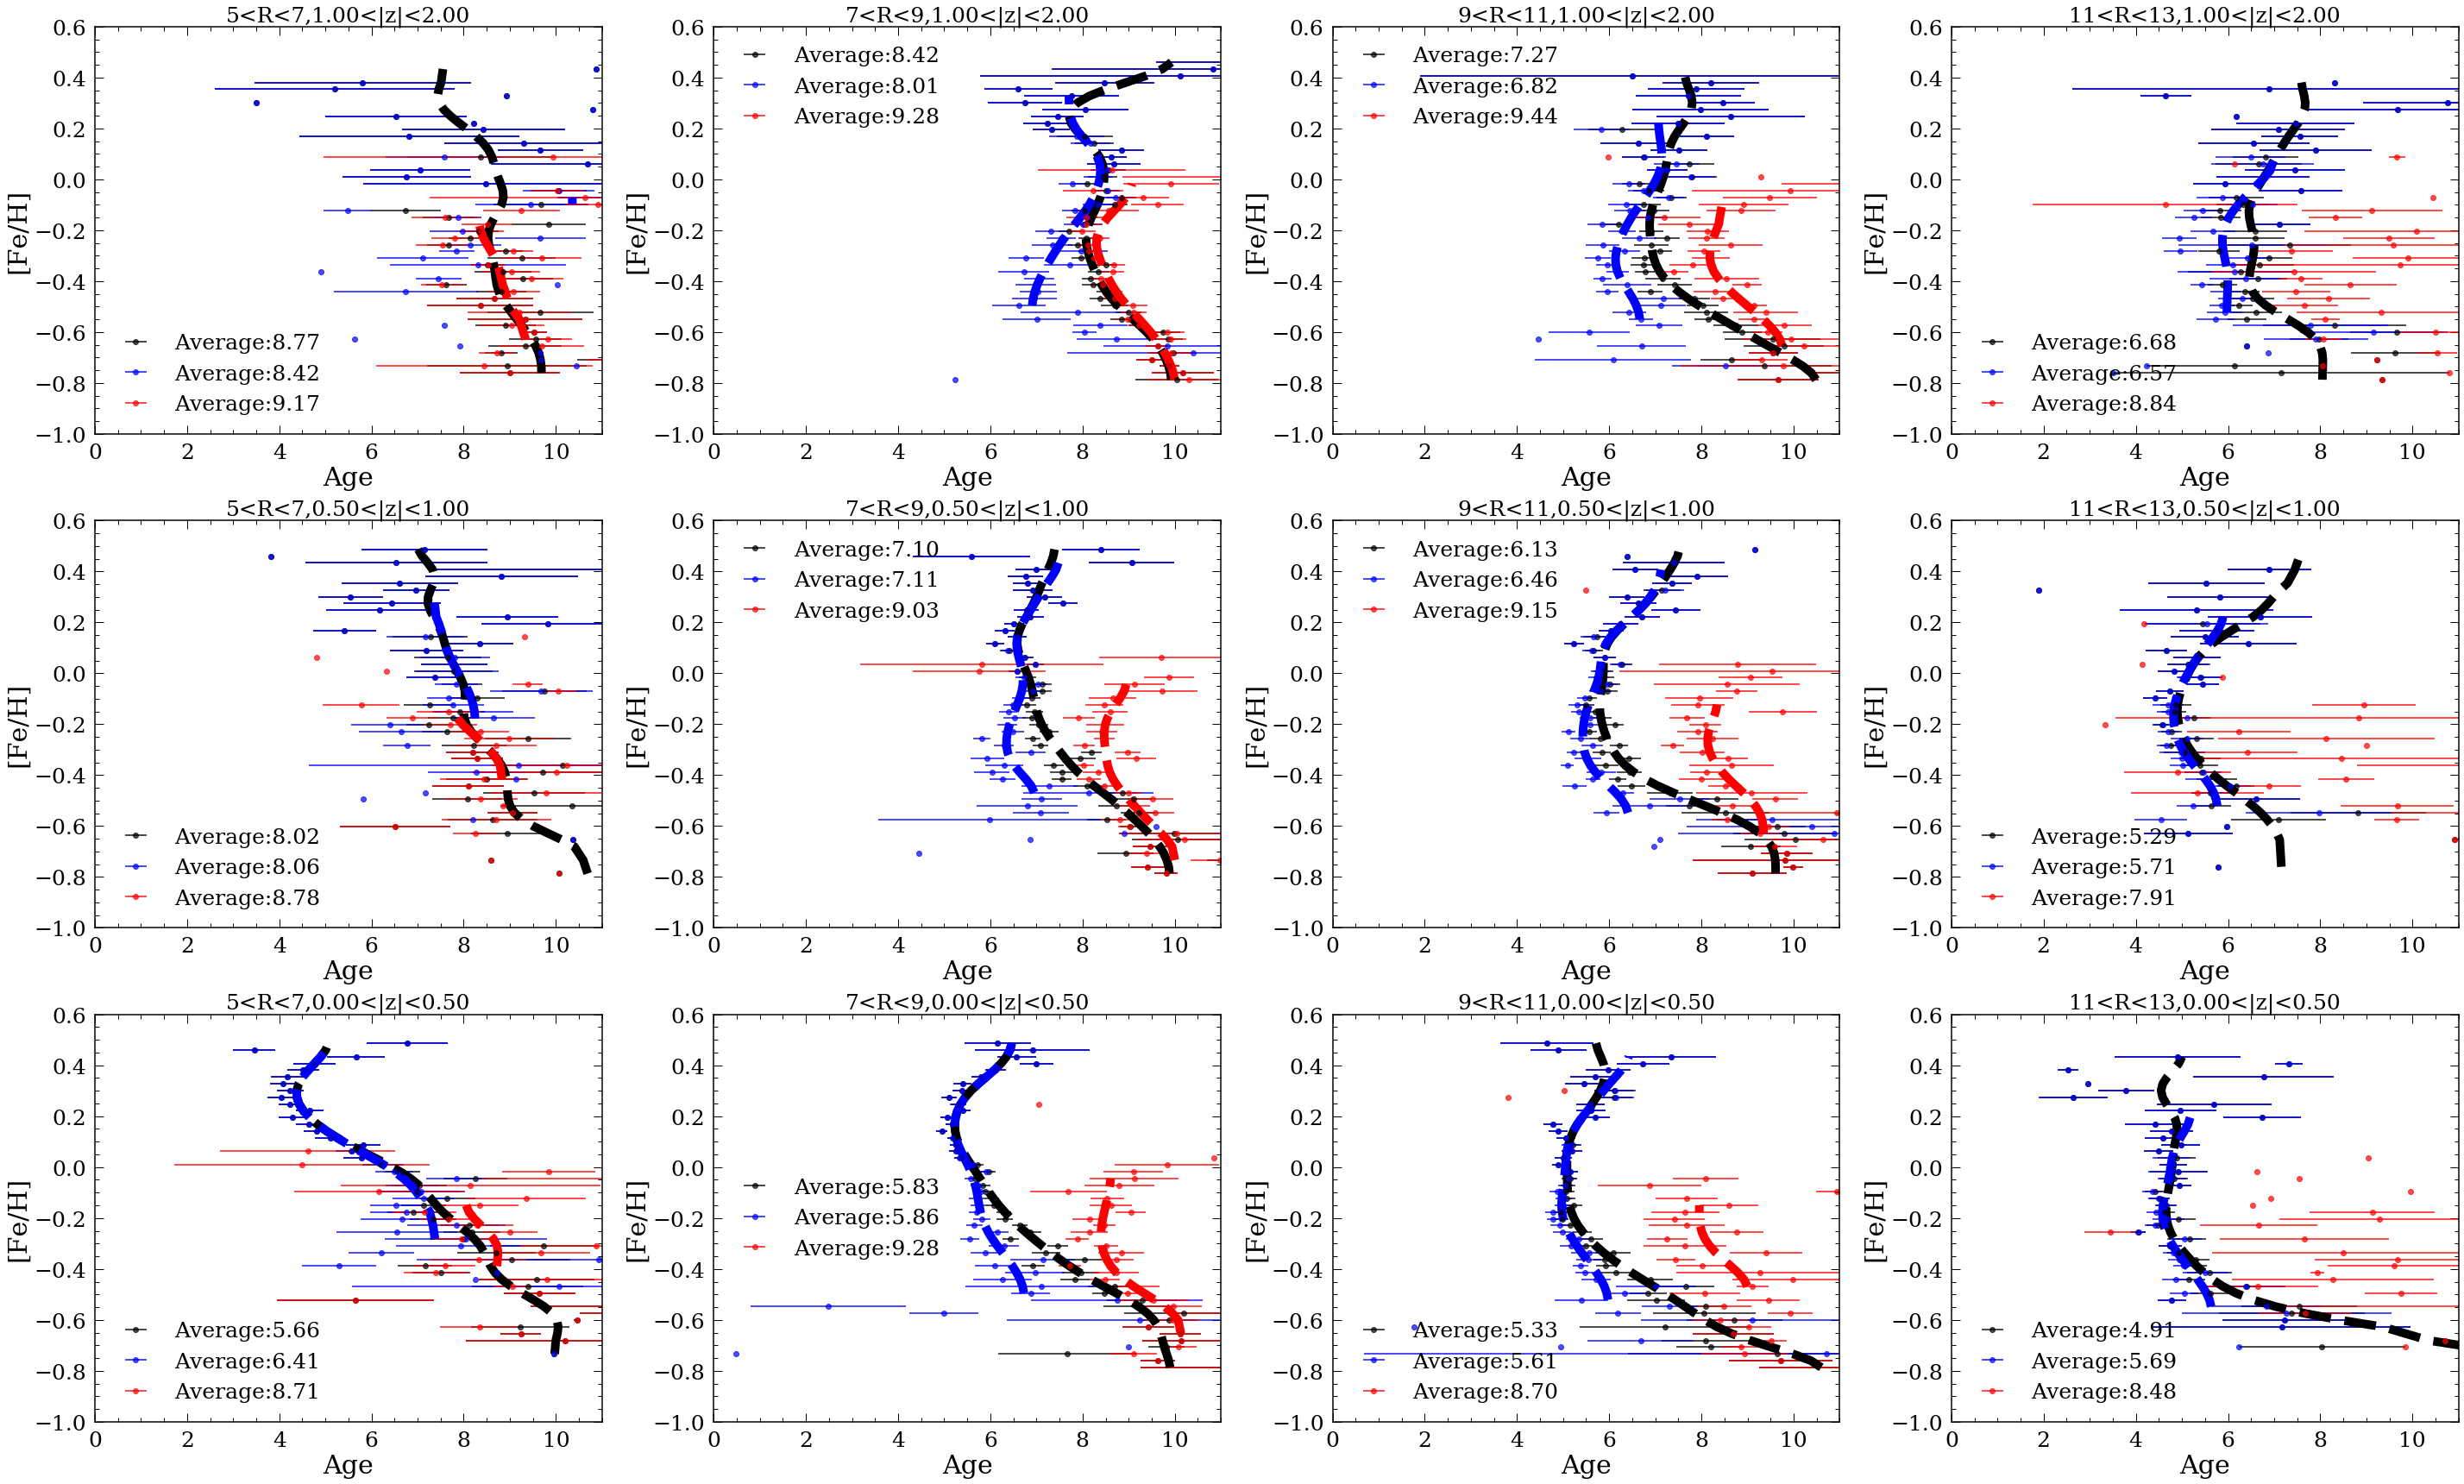

In [12]:
#Rbin=[5,7,9,11,13]
#zbin=[0,0.5,1,2]
#Rbin=[2,1,0.5,0]
Rbin=[2,1,0.5,0]
zbin=[5,7,9,11,13]
plt.figure(figsize=(40,24))
count=1
for i in range(len(Rbin)-1):
    df_all=df_CM.loc[df_CM['z']>Rbin[i+1]]
    df_all=df_all.loc[df_all['z']<Rbin[i]]
        
    for j in range(len(zbin)-1):
        df_all_z=df_all.loc[abs(df_all['R'])>zbin[j]]
        df_all_z=df_all_z.loc[abs(df_all_z['R'])<zbin[j+1]]
        
        df_all_z=df_all_z.dropna(subset=['M_H','Age'])
        
        meanfeh,meanage,meanage_err,starnumb=getave_age(df_all_z['Age'],df_all_z['M_H'])
        
        m=(meanfeh!=0)
        meanfeh,meanage,meanage_err,starnumb=meanfeh[m],meanage[m],meanage_err[m],starnumb[m]
        
        plt.subplot(3,4,count)
        plt.errorbar(meanage,meanfeh,xerr=meanage_err,fmt='ko',alpha=0.7,label='Average:%.2f'%np.mean(df_all_z['Age']))
        filterage=gaussian_filter(meanage, sigma=3)
        plt.plot(filterage,meanfeh,'k--',linewidth=10)
        
        
        colors=['b','r','y']
        for k in df_CM['hi_low'].unique():
            ha_bin_z=df_all_z.loc[df_all_z['hi_low']==k]
            meanfeh_ha,meanage_ha,meanage_err_ha,starnumb_ha=getave_age(ha_bin_z['Age'].values,
                                                                    ha_bin_z['M_H'].values)
            
            m=(meanfeh_ha!=0)
            meanfeh_ha,meanage_ha,meanage_err_ha,starnumb_ha=meanfeh_ha[m],meanage_ha[m],meanage_err_ha[m],starnumb_ha[m]
            clear_output(wait = True)
            m2=starnumb_ha>10
            plt.errorbar(meanage_ha,meanfeh_ha,xerr=meanage_err_ha,color=colors[k],
                         fmt='o',alpha=0.7,label='Average:%.2f'%np.mean(meanage_ha))
        
            filterage=gaussian_filter(meanage_ha[m2], sigma=3)
            plt.plot(filterage,meanfeh_ha[m2],'--',color=colors[k],linewidth=10)
            
            #plt.scatter(meanage_ha,meanfeh_ha,c=colors[j],label='Average:%.2f'%np.mean(ha_bin_z['Age']))
            
        
            #plt.xlim([0,10])
            #plt.ylim([-2,0.5])
        plt.xlabel('Age')
        plt.ylabel('[Fe/H]')
        """
        if count==10:
            plt.plot([4.66],[0],'bo',markersize=30)
        """    
        plt.xlim([0,11])
        plt.ylim([-1,0.6])
        plt.legend()
        count=count+1
        plt.title('%d<R<%d,%.2f<|z|<%.2f'%(zbin[j],zbin[j+1],Rbin[i+1],Rbin[i]),fontsize=25)
plt.tight_layout()
        
plt.savefig('FeAge_cluster.png')

# screwness

In [131]:
df_CM=pd.read_pickle('../CannonDR16_cut.pkl')



In [7]:
from scipy.stats import skew
def calcaverage(df):
    #xgrit=np.linspace(min(df['R']),max(df['R']),50)
    #ygrit=np.linspace(min(df['z']),max(df['z']),50)
    r_range=50
    z_range=25
    R=np.linspace(0,20,r_range)
    z=np.linspace(-5,5,z_range)
    R_grid=[]
    z_grid=[]
    age_grid=[]
    count=0
    for i in trange(r_range-1):
        for j in range(z_range-1):
            R_grid.append((R[i]+R[i+1])/2.)
            z_grid.append((z[j]+z[j+1])/2.)
            
            df_grid=df.loc[df['R']>R[i]]
            #print(len(df_grid))
            df_grid=df_grid.loc[df_grid['R']<R[i+1]]
            #print(len(df_grid))
            df_grid=df_grid.loc[df_grid['z']>z[j]]
            #print(len(df_grid))
            df_grid=df_grid.loc[df_grid['z']<z[j+1]]
            #print(len(df_grid))
            
            df_grid=df_grid.dropna(subset=['M_H'])
            if len(df_grid)>20:
                #age_grid.append(3*(np.mean(df_grid['M_H'])-np.median(df_grid['M_H']))/np.std(df_grid['M_H']))
                age_grid.append(skew(df_grid['M_H'].values))
                #print(skew(df_grid['M_H'].values))
            else:
                age_grid.append(np.nan)
            #print(df_grid['Age'])
    #print(age_grid)
    return R_grid,z_grid,age_grid

In [150]:
R_grid,z_grid,screwness=calcaverage(df_CM)

100%|██████████| 49/49 [00:44<00:00,  1.10it/s]


In [134]:
R_grid,z_grid,screwness_la=calcaverage(df_CM.loc[df_CM['hi_low_line']==0].reset_index(drop=True))

100%|██████████| 49/49 [00:32<00:00,  1.50it/s]


In [135]:
R_grid,z_grid,screwness_ha=calcaverage(df_CM.loc[df_CM['hi_low_line']==1].reset_index(drop=True))

100%|██████████| 49/49 [00:16<00:00,  2.97it/s]


In [136]:
skrewness=pd.DataFrame(np.array((R_grid,z_grid,screwness,screwness_la,screwness_ha)).T,columns=['R','z','skew','skew_la','skew_ha'])
skrewness.to_pickle('../skewness_scipy.pkl')
skrewness


R         z  skew  skew_la  skew_ha
0      0.204082 -4.791667   NaN      NaN      NaN
1      0.204082 -4.375000   NaN      NaN      NaN
2      0.204082 -3.958333   NaN      NaN      NaN
3      0.204082 -3.541667   NaN      NaN      NaN
4      0.204082 -3.125000   NaN      NaN      NaN
...         ...       ...   ...      ...      ...
1171  19.795918  3.125000   NaN      NaN      NaN
1172  19.795918  3.541667   NaN      NaN      NaN
1173  19.795918  3.958333   NaN      NaN      NaN
1174  19.795918  4.375000   NaN      NaN      NaN
1175  19.795918  4.791667   NaN      NaN      NaN

[1176 rows x 5 columns]

In [2]:
skrewness=pd.read_pickle('../skewness_scipy.pkl')

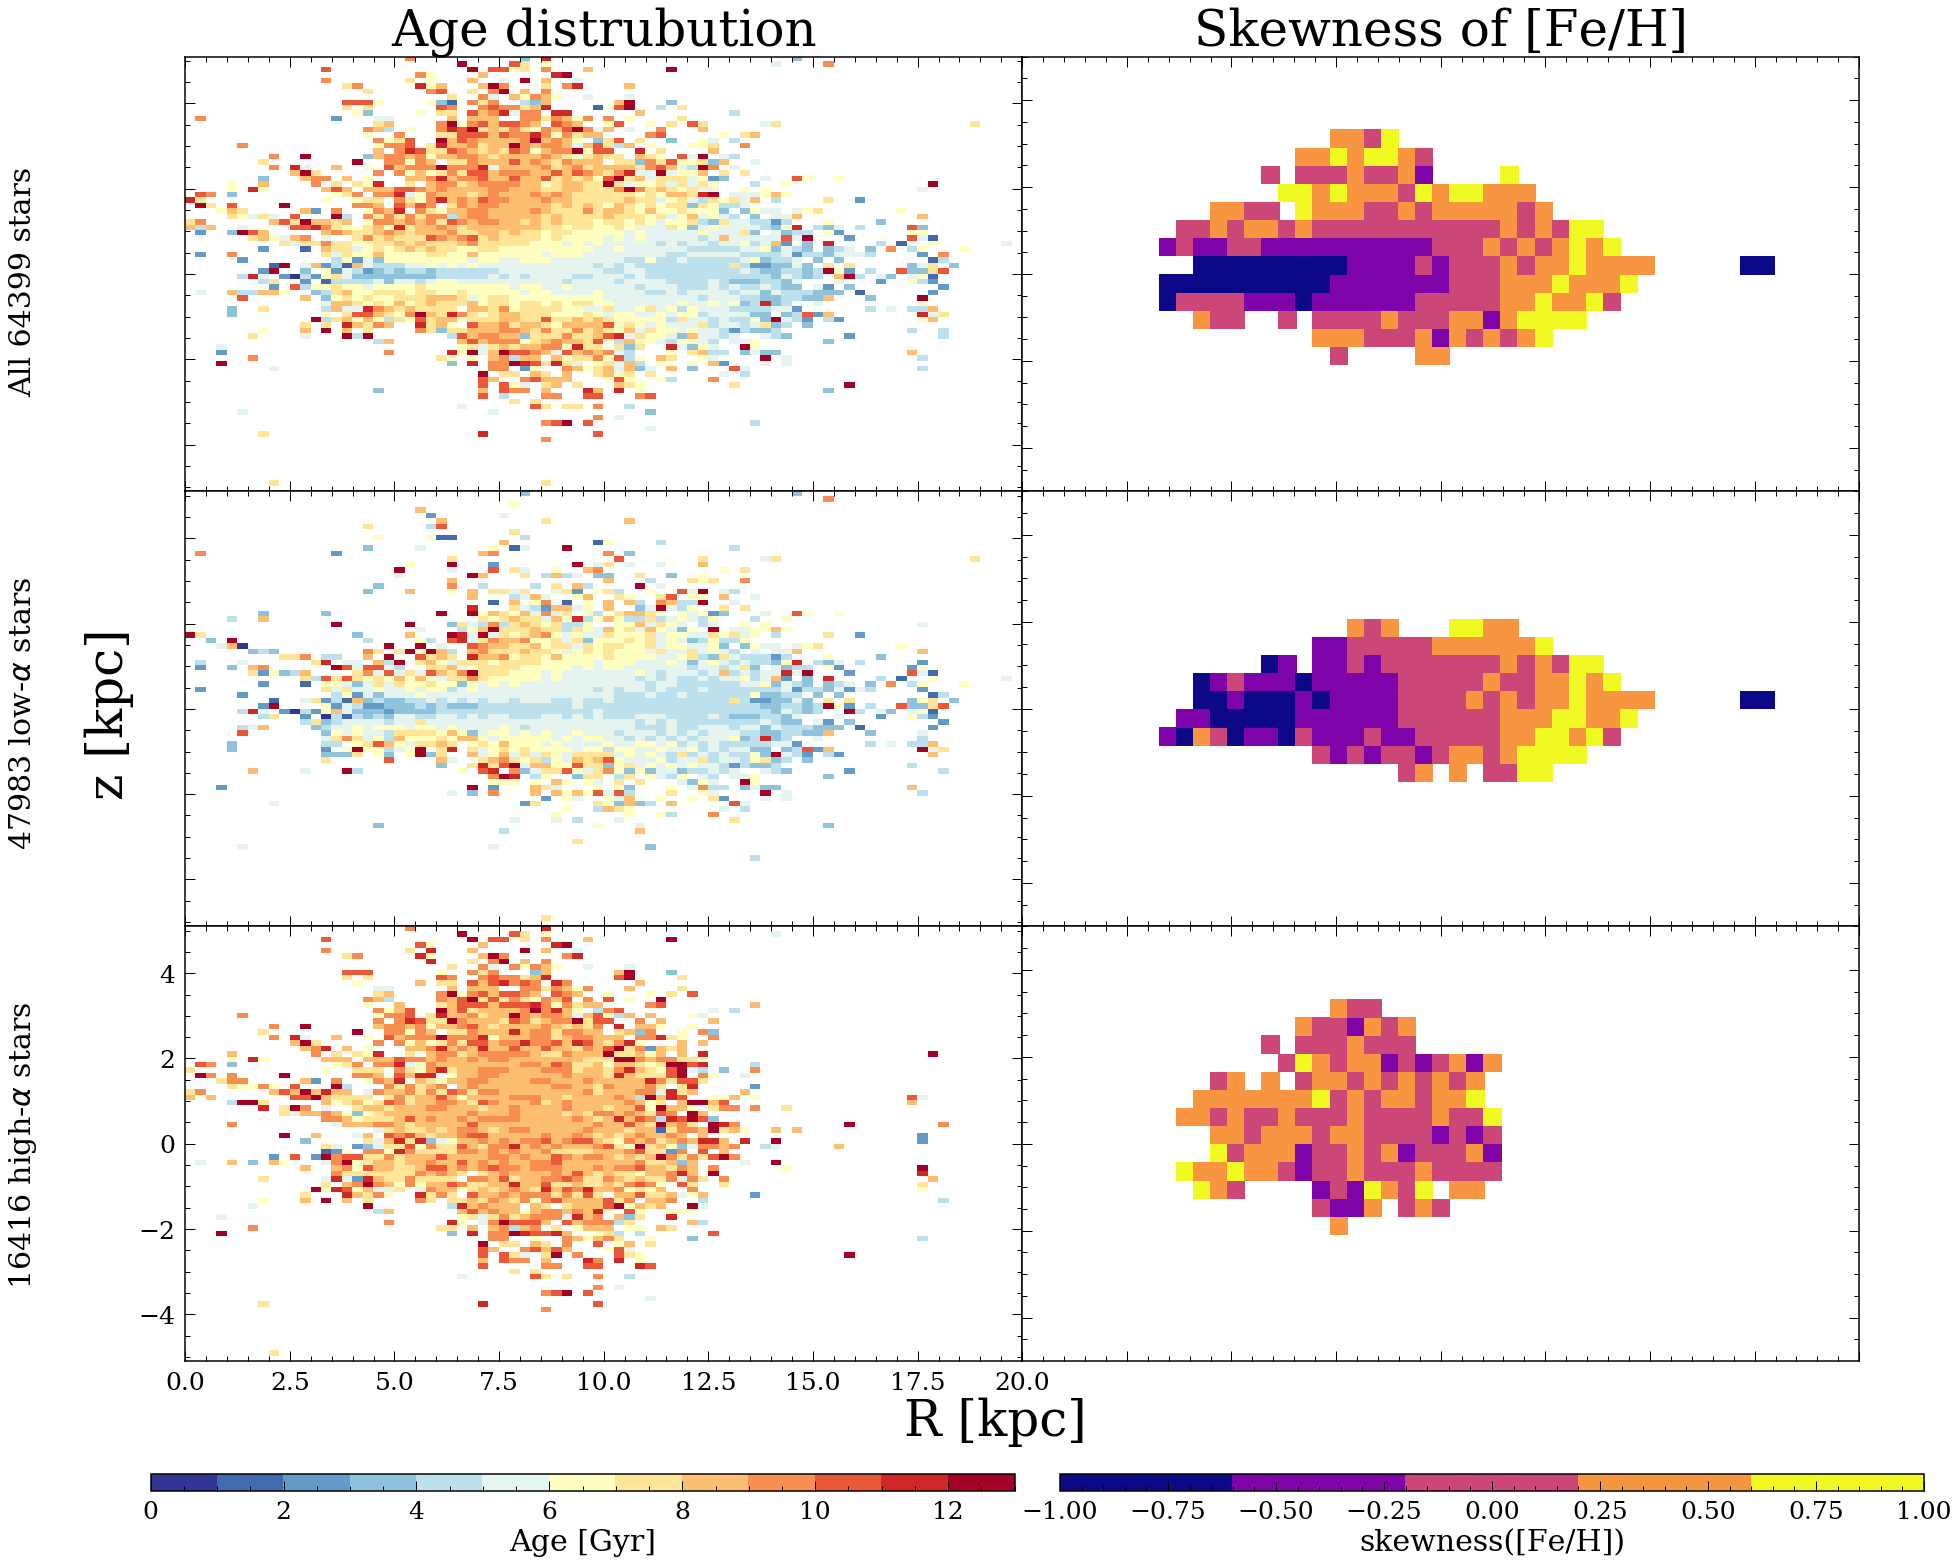

In [26]:
x1,x2,y1,y2 = 0,20,-5.1,5.1
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 80


fig, axarr = plt.subplots(3,2,gridspec_kw={'hspace': 0, 'wspace': 0},
                          figsize=(30,24))

cm = plt.cm.get_cmap('plasma',5)
im=axarr[0,1].scatter(skrewness['R'],skrewness['z'],marker='s',c=skrewness['skew'],
                   cmap=cm,vmin=-1,vmax=1,s=300,alpha=1,label='All Stars')
axarr[0,1].set_xlim([0,20])
axarr[0,1].set_ylim([-5,5])
axarr[0,1].set_title('Skewness of [Fe/H]',fontsize=50)
axarr[0,1].set_yticklabels([])
axarr[0,1].set_xticklabels([])

axarr[1,1].scatter(skrewness['R'],skrewness['z'],marker='s',c=skrewness['skew_la'],
                   cmap=cm,vmin=-1,vmax=1,s=300,alpha=1,label='low-$\\alpha$ disk')
axarr[1,1].set_xlim([0,20])
axarr[1,1].set_ylim([-5,5])
axarr[1,1].set_yticklabels([])
axarr[1,1].set_xticklabels([])

axarr[2,1].scatter(skrewness['R'],skrewness['z'],marker='s',c=skrewness['skew_ha'],
                   cmap=cm,vmin=-1,vmax=1,s=300,alpha=1,label='high-$\\alpha$ disk')
axarr[2,1].set_xlim([0,20])
axarr[2,1].set_ylim([-5,5])
axarr[2,1].set_yticklabels([])
axarr[2,1].set_xticklabels([])

cb_ax = fig.add_axes([0.53, 0.05, 0.4, 0.01])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
car = cbar.set_label('skewness([Fe/H])',fontsize = 30,labelpad = 5)




cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
cmap1.set_bad('white',1.)

image=makeagemap_each(df_CM['R'].values,df_CM['z'].values,
                df_CM['Age'].values,lims, binnum)
axarr[0,0].imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
           extent = (x1,x2, y1,y2),cmap=cmap1, vmin=0,vmax=13,label=('All %d Stars'%len(df_CM)))
axarr[0,0].set_title('Age distrubution',fontsize=50)
axarr[0,0].set_yticklabels([])
axarr[0,0].set_xticklabels([])

image=makeagemap_each(df_CM.loc[df_CM['hi_low_line']==0]['R'].values,df_CM.loc[df_CM['hi_low_line']==0]['z'].values,
                df_CM['Age'].loc[df_CM['hi_low_line']==0].values,lims, binnum)
im=axarr[1,0].imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
           extent = (x1,x2, y1,y2),cmap=cmap1, vmin=0,vmax=13)
axarr[1,0].set_yticklabels([])
axarr[1,0].set_xticklabels([])

image=makeagemap_each(df_CM.loc[df_CM['hi_low_line']==1]['R'].values,df_CM.loc[df_CM['hi_low_line']==1]['z'].values,
                df_CM['Age'].loc[df_CM['hi_low_line']==1].values,lims, binnum)
axarr[2,0].imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
           extent = (x1,x2, y1,y2),cmap=cmap1, vmin=0,vmax=13)

cb_ax = fig.add_axes([0.109, 0.05, 0.4, 0.01])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
car = cbar.set_label('Age [Gyr]',fontsize = 30,labelpad = 5)

fig.text(0.09, 0.5, 'z [kpc]', ha='center', va='center', rotation='vertical',fontsize=50)
fig.text(0.5, 0.09, 'R [kpc]', ha='center', va='center', rotation='horizontal',fontsize=50)

fig.text(0.05, 0.75, 'All %d stars'%len(df_CM), ha='center', va='center', rotation='vertical',fontsize=30)
fig.text(0.05, 0.5, '%d low-$\\alpha$ stars'%len(df_CM.loc[df_CM['hi_low_line']==0]),
         ha='center', va='center', rotation='vertical',fontsize=30)
fig.text(0.05, 0.25, '%d high-$\\alpha$ stars'%len(df_CM.loc[df_CM['hi_low_line']==1]), 
         ha='center', va='center', rotation='vertical',fontsize=30)

#fig.autofmt_xdate()

plt.savefig('fehskew.png')



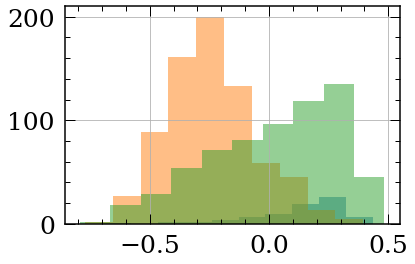

In [122]:
stars=df_CM.loc[abs(df_CM['R']-17.5)<0.2]
stars=stars.loc[abs(df_CM['z'])<1]
stars['M_H'].hist(alpha=0.5)


stars=df_CM.loc[abs(df_CM['R']-12.5)<0.2]
stars=stars.loc[abs(df_CM['z'])<1]
stars['M_H'].hist(alpha=0.5)

stars=df_CM.loc[abs(df_CM['R']-5)<0.2]
stars=stars.loc[abs(df_CM['z'])<1]
stars['M_H'].hist(alpha=0.5)

In [16]:
febins=np.linspace(-0.8,0.5,50)

In [18]:
np.diff(febins)

array([0.02653061, 0.02653061, 0.02653061, 0.02653061, 0.02653061,
       0.02653061, 0.02653061, 0.02653061, 0.02653061, 0.02653061,
       0.02653061, 0.02653061, 0.02653061, 0.02653061, 0.02653061,
       0.02653061, 0.02653061, 0.02653061, 0.02653061, 0.02653061,
       0.02653061, 0.02653061, 0.02653061, 0.02653061, 0.02653061,
       0.02653061, 0.02653061, 0.02653061, 0.02653061, 0.02653061,
       0.02653061, 0.02653061, 0.02653061, 0.02653061, 0.02653061,
       0.02653061, 0.02653061, 0.02653061, 0.02653061, 0.02653061,
       0.02653061, 0.02653061, 0.02653061, 0.02653061, 0.02653061,
       0.02653061, 0.02653061, 0.02653061, 0.02653061])